<div style="border:solid green 2px; padding: 20px">
<b>Hello Maxim!</b>

My name is Grigoriy and I'm going to review your project.

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.**


You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

# <font color='orange'>General feedback</font>
Thank you for sending your project! Great job, thank you for all these advanced charts. Pleasepay attention to:
* Incorrect release dates for platfroms
* Equal test samples for the second test

I've marked all problem points below.

**Update**:<br>
Thank you for the update. I've left more detailed comments abouts T-tests below.

**Update**:<br>
Thank you for sending your project again. Well done, your project has been accepted.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>Top 50 matplotlib visualizations: <a>https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python//</a></li>
        <li>Style Pandas Dataframe Like a Master: <a>https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0</a></li>
        <li>17 Statistical Hypothesis Tests in Python (Cheat Sheet): <a>https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/</a></li>
        <li>The ultimate markdown guide for jupyter notebooks<a>https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd</a></li>
    </ul>
</div>

---

# The Project: Which games are better?

We make the work for the on-line store Ice, which sells video games all over the world. Historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

# Purposes of the analysis

Purposes of the analysis are to determine the factors which make the games more successful. We need to choose the platforms with the greatest total sales and find platforms that used to be popular but now have zero sales. We will evaluate how user and professional reviews affect sales for one of the most popular platforms. We will also find the genres with high and low sales. For each region we will find the top-5 platforms and the top-5 5 genres. We need also to check if ESRB ratings does affect sales in individual regions. After that we will test the Hypotheses:

**Hypotheses** are as follows:  
1. Average user ratings of the Xbox One and PC platforms are the same.
2.  Average user ratings for the Action and Sports genres are different, Action genre games have higher ratings

The first steps is to load all nessecary libraries. Then we will open the data file and explore the general information, investigating missing and impossible values, determing errors in data. After fixing all issues we found we will enrich our data for further analysis and perform all necessary analysis and ststistical tests with clean data.

## Initialization

In [1]:
! pip install -qq sidetable

In [2]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import sidetable
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [3]:
# Loading the data files 

data_games = pd.read_csv('/datasets/games.csv')

In [4]:
print(data_games.loc[13549])
print(data_games.loc[3102])

Name               Battlezone
Platform                  PS4
Year_of_Release        2016.0
Genre                  Action
NA_sales                 0.02
EU_sales                 0.02
JP_sales                  0.0
Other_sales              0.01
Critic_Score             66.0
User_Score                  7
Rating                      T
Name: 13549, dtype: object
Name               Mortal Kombat
Platform                     PSV
Year_of_Release           2012.0
Genre                   Fighting
NA_sales                    0.42
EU_sales                    0.13
JP_sales                     0.0
Other_sales                  0.1
Critic_Score                85.0
User_Score                   7.8
Rating                         M
Name: 3102, dtype: object


## Preparing the data

In [5]:
# Checking general information of the dataframe and printing sample 

print(data_games.info())
raw_size = len(data_games)  # Calculating the initial dataframe size
display(data_games.describe())
display(data_games.head(10))
print()
data_games.stb.missing(style=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


### `Name` column

In [6]:
name_list = data_games['Name'].unique().tolist()
#name_list = sorted(name_list)

print(f'Total amount of games in the dataframe: ', len(name_list))
print()

# Checking for entries with missing values

print('Entries with missing values:')
display(data_games.query('Name.isna()'))

Total amount of games in the dataframe:  11560

Entries with missing values:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Total amount of games on the dataframe (11560) is less than its total size which means we either have duplicate values or differents `Platform` for the game with the same `Name` value. On this stage wi will not check the correct spelling of the valuems in the `Name` column and assume that their is no misspelled entries.  
There are 2 entries with NaN values in both `Name` and `Genre` columns (as well as in other few columns), which contains no informatiom for us to restore any of this values and they shoud be eliminated.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Yes, agree.
</div>

### `Platform` column

In [7]:
# Checking the unique names and the total amount of platforms
print(data_games['Platform'].unique().tolist())
print(f'Total amount of platforms: ', len(data_games['Platform'].unique()))

['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
Total amount of platforms:  31


### `Year_of_Release` column

In [8]:
# Checking the unique years and the total amount of years
yor = data_games['Year_of_Release'].unique().tolist()
yor.sort()
print(yor)

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]


In [9]:
# Checking the entries with missing values in 'year_of_release' column
print(data_games.query('Year_of_Release.isna()'))
print(len(data_games.query('Year_of_Release.isna()')['Name'].unique()))

                                    Name Platform  Year_of_Release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

Some games have `year_of_release` value missed on particular platform and we can fill those missing values with minimum values from the other platform for this game.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Ok
</div>

### `Genre` column

In [10]:
# Checking the unique values in the column
genre_list = data_games['Genre'].unique().tolist()
print(genre_list)

['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy', nan]


### `Critic_Score` column

In [11]:
# Checking the unique values in the column
cs = data_games['Critic_Score'].unique()
cs.sort()
print(cs)

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


### `User_Score` column

In [12]:
# Checking the unique values in the column
print(data_games['User_Score'].unique())
print()
print(f'Total amount of "tbd" values in the column: ', 
      len(data_games.query('User_Score == "tbd"')['Name'].unique()))
print()
data_games.stb.missing(style=True)

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Total amount of "tbd" values in the column:  1941



,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


We have string format positive values in the column, no one exceeding maximum amount of 100 (as per Data discription) and 1941 'tbd' values, which may be the result of ..... and may be partially restored with regards to the `user_score` values of the same games on the other platforms.

### `Rating` column

In [13]:
# Checking the unique values in the column
print(f'List of unique values: ', data_games['Rating'].unique().tolist())
print()
print('Distribution of values in the column')
print(data_games['Rating'].value_counts())

List of unique values:  ['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

Distribution of values in the column
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64


We have 2 outfated codes among values ('K-A' and 'EC'),one very rare rating ('AO') in one entry, 3 entries for not yet defined rating ('RP'). Outdated ratings should be replaced with actual one ('E'), one entry with 'AO' can be drooped off since it will not affect our further analysis and 'RP' values replaced with 'unknown'. We can then treat missing vaalues with the most common values for the same games on the other platforms (if any). 

<div class="alert alert-success">
<b>Reviewer's comment:</b> Cool, great that you researched ESBR ratings.
</div>

## Fixing data

### Column names

First of all we will convert all column names to lowecase.

In [14]:
# Converting column names to lowecase
data_games.columns = data_games.columns.str.lower()

# Checking that everything is correct
print(data_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Missing names

Now we can drop off two entries with NaN values in both `name` and `genre`column thus fixing missing values issues for both columns. 

In [15]:
# Dropping missing values in 'name' column
data_games.dropna(subset=['name'], inplace=True)

# Checking that everything is correct
data_games.stb.missing(style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,269,"16,713",1.61%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


### Year of release

We have 269 missing values in `year_of_release` column. Since many games were released for several platforms simalteniously we can try to restore some missing values with minimum values of `year_of_release` for those games for other platforms.

Since many popular games were previously released for old platforms in 1980-1990 (PC/2600) this approach may lead to incorrect values for the platforms, entered the market in 2000 or later (e.g. PS3/PS4/PSV etc.)

In [16]:
# Checking missing values
data_games.stb.missing(style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,269,"16,713",1.61%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


For remaining issues we have no reliable information for restoring missing values and since their amount is less than 2% we can drop them off without any serious affect to our further conclusions.

In [17]:
# Dropping missing values in 'Year_of_Release' column
data_games.dropna(subset=['year_of_release'], inplace=True)

# Checking that everything is correct
data_games.stb.missing(style=True)

,missing,total,percent
critic_score,"8,461","16,444",51.45%
rating,"6,676","16,444",40.60%
user_score,"6,605","16,444",40.17%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%


We dropped all the entries with NaN values in the column.

### Critic score

We have a large amount of missing values in the remaining 3 columns: `critic_score`, `user_score` and `rating` with more, than a half of the dataframe for `critic_score` column. The approach is to try to restore as much missing values as possible based on the mean or median values for those games for other platforms. First we need to check whether mean or median may be used.

In [18]:
# Creating new dataframe without missing values in 'critic_score'
data_games_critic = data_games.query('critic_score.notna()').reset_index()

# Calculating mean and median for new dataframe
data_games_critic.pivot_table(index='name', 
                              values='critic_score', 
                              aggfunc=('mean', 'median'))

,mean,median
name,,
Tales of Xillia 2,71.0,71.0
.hack//Infection Part 1,75.0,75.0
.hack//Mutation Part 2,76.0,76.0
.hack//Outbreak Part 3,70.0,70.0
007 Racing,51.0,51.0
...,...,...
inFAMOUS: Second Son,80.0,80.0
nail'd,65.0,65.0
pro evolution soccer 2011,77.4,78.0


Mean is practically equals to median so we can replace missing values with mean value.

In [19]:
# Creating a dictionary for 'critic_value' with means as values
critic_score_dict = data_games_critic.groupby('name')['critic_score'].mean().to_dict()

# Replacing missing values with dictionary values
data_games['critic_score'].fillna(data_games['name'].map(critic_score_dict), inplace=True)

# Checking the result
data_games.stb.missing(style=True)

,missing,total,percent
critic_score,"7,522","16,444",45.74%
rating,"6,676","16,444",40.60%
user_score,"6,605","16,444",40.17%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%


From 8492 to 7532 - we managed to fix 960 issues. For the remaining issues we do not have reliable information and we fill missing values with -1 value to simplify further analisys.

In [20]:
# Replacing remaining missing values in 'critic_score' column
data_games['critic_score'] = data_games['critic_score'].fillna(-1)

# Checking the result
data_games.stb.missing(style=True)

,missing,total,percent
rating,"6,676","16,444",40.60%
user_score,"6,605","16,444",40.17%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%
other_sales,0,"16,444",0.00%


We finally fixed all missing values in `critic_score` column.

### User score

We can apply the similar approach to treat missing values in the `user_score` column taking into considaration the addtitional "tbd" values and values type. 

In [21]:
# Creating the new dataframe without missing values and "tbd" values
data_games_user = data_games.query('user_score.notna() and user_score != "tbd"').reset_index()

# Changing 'user_score' to calculate mean and median
data_games_user['user_score'] = data_games_user['user_score'].astype(float)

# Calculating the mean and median 
data_games_user.pivot_table(index='name', values='user_score', aggfunc=('mean', 'median'))

,mean,median
name,,
Tales of Xillia 2,7.90,7.90
.hack//Infection Part 1,8.50,8.50
.hack//Mutation Part 2,8.90,8.90
.hack//Outbreak Part 3,8.70,8.70
007 Racing,4.60,4.60
...,...,...
inFAMOUS 2,8.40,8.40
inFAMOUS: Second Son,7.90,7.90
nail'd,6.65,6.65


Mean is practically equal to median so we can replace missing values with mean value.

In [22]:
# Creating ductionary for 'user_value' with means as values
user_score_dict = data_games_user.groupby('name')['user_score'].mean().to_dict()

# Changing data type to comply with that of original dataframe
user_score_dict  ={k: str(v) for k, v in user_score_dict.items()}

# Replacing 'tbd' values with NaN values for filiing from the dictionary
data_games.loc[data_games['user_score'] == "tbd", 'user_score'] = np.nan

# Filling missing values from the dictionary
data_games['user_score'].fillna(data_games['name'].map(user_score_dict), inplace=True)

# Checking the result
data_games.stb.missing(style=True)

,missing,total,percent
user_score,"7,920","16,444",48.16%
rating,"6,676","16,444",40.60%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%
other_sales,0,"16,444",0.00%


From 8574 (6633 missing values + 1941 'tbd' values) to 7928 - we managed to fix 646 issues. For the remaining issues we do not have reliable information and we fill missing values with minus 1 value to simplify further analisys.

In [23]:
# Replacing remaining missing values in 'user_score' column
data_games['user_score'] = data_games['user_score'].fillna(-1)

# Checking the result
data_games.stb.missing(style=True)

,missing,total,percent
rating,"6,676","16,444",40.60%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%
other_sales,0,"16,444",0.00%
critic_score,0,"16,444",0.00%


All missing values issues are fixed and we can finish with the last column - `rating` one.

### Rating

In [24]:
#Cheking the original distribution of values
print(data_games['rating'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64


'K-A' and 'EC' ratings were replaced with 'E' rating by the end of XX century, so we can unify theire codes with current one. The only representative of 'Adults only' (AO) rating can be removed since this rating was issued for 27 games only and this removal will not affect our future conclusions. 

In [25]:
# Replacing old and missing values in 'rating' column
data_games['rating'] = data_games['rating'].replace(['K-A', 'EC'], 'E') # In 1998 'K-A' rating was replaced by 'E'
data_games['rating'] = data_games['rating'].replace(['RP'], 'unknown') # In 1998 'K-A' rating was replaced by 'E'
data_games['rating'] = data_games['rating'].fillna('unknown') # Filling missing values with 'unknown'
data_games = data_games.query('rating != "AO"') # Removing single AO rating row

# Checking current distribution
print(data_games['rating'].value_counts())

# Checking the result
data_games.stb.missing(style=True)

unknown    6677
E          3932
T          2905
M          1536
E10+       1393
Name: rating, dtype: int64


,missing,total,percent
name,0,"16,443",0.00%
platform,0,"16,443",0.00%
year_of_release,0,"16,443",0.00%
genre,0,"16,443",0.00%
na_sales,0,"16,443",0.00%
eu_sales,0,"16,443",0.00%
jp_sales,0,"16,443",0.00%
other_sales,0,"16,443",0.00%
critic_score,0,"16,443",0.00%
user_score,0,"16,443",0.00%


In [26]:
# Replacing `rating` column values with most common 'rating values for each game
data_games['rating'] = data_games.groupby('name')['rating'].transform(lambda x: x.value_counts().idxmax())

# Checking current distribution
print(data_games['rating'].value_counts())

# Checking the result
data_games.stb.missing(style=True)

unknown    6597
E          3988
T          2896
M          1551
E10+       1411
Name: rating, dtype: int64


,missing,total,percent
name,0,"16,443",0.00%
platform,0,"16,443",0.00%
year_of_release,0,"16,443",0.00%
genre,0,"16,443",0.00%
na_sales,0,"16,443",0.00%
eu_sales,0,"16,443",0.00%
jp_sales,0,"16,443",0.00%
other_sales,0,"16,443",0.00%
critic_score,0,"16,443",0.00%
user_score,0,"16,443",0.00%


We managed to cut the amount of 'unknown' entries from 6701 to 6393 (by 308 items) and now all games in the dataframe have the same `rating` value regardless of the `platform`.

In [27]:
# Changing data type
data_games['year_of_release'] = data_games['year_of_release'].astype(int)
data_games['critic_score'] = data_games['critic_score'].astype(int)
data_games['user_score'] = data_games['user_score'].astype(float)

# Checking that everything is correct
print(data_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None


In [28]:
# Checking for duplicates

print(f'Number of duplicated rows in the dataframe: ', data_games.duplicated().sum())

Number of duplicated rows in the dataframe:  0


In [29]:
# Checking the amount of lost data
clean_size = len(data_games)
print(f'We have lost {(raw_size - clean_size)/raw_size:.2%} of original data')

We have lost 1.63% of original data


In [30]:
# Checking the statistics and sample of the clean dataframe
print(data_games.describe())
print()
display(data_games.head(15))

       year_of_release      na_sales      eu_sales      jp_sales  \
count     16443.000000  16443.000000  16443.000000  16443.000000   
mean       2006.486347      0.263952      0.145902      0.078492   
std           5.875692      0.818366      0.506719      0.311109   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score    user_score  
count  16443.000000  16443.000000  16443.000000  
mean       0.047591     36.849115      3.192713  
std        0.188011     36.272547      4.184322  
min        0.000000     -1.000000     -1.000000  
25%        0.000000     -1.000000     -1.000000  
50%        0.010000     47.000000      3.600000  
75%        0.030000     72.000000    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown


After treating missing values and fixing all issues we lost 1.63% of raw data. The number of rows has been reduced to 16443.  

## Enriching data

In [31]:
# Calculating of total sales per each game
data_games['total_sales'] = data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
# Checking that everything is correct
print(data_games['total_sales'].describe())

count    16443.000000
mean         0.535937
std          1.558794
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


We may need the information about the first appearence of the platform on the market.

In [32]:
# Adding the first year of release for each platform
data_games.loc[data_games.groupby('platform')['year_of_release'].idxmin(),'first_year'] = 1
data_games['first_year'] = data_games['first_year'].fillna(0)

# Checking that everything is correct
print(data_games.info())
print(f'Amount of platforms on the market: ', len(data_games.query('first_year == 1')))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
 12  first_year       16443 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 2.3+ MB
None
Amount of platforms on the market:  31


We finished the fixing and encriching data and will check the clean data dataframe.

In [33]:
# Checking general information about dataframe
print(data_games.info())
print()
print(data_games.describe())
print()

# Checking the sample of the dataframe
display(data_games.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
 12  first_year       16443 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 2.3+ MB
None

       year_of_release      na_sales      eu_sales      jp_sales  \
count     16443.000000  16443.000000  16443.000000  16443.000000 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,first_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,1.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,0.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,0.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38,0.0
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown,30.26,0.0
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80,0.0
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91,0.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32,0.0
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown,28.31,0.0


## Analyzing data

### Release of new games and platforms per each year

Let's have a look at the distribution of new games on the market per each year.

In [34]:
# Defining function to show values at the top of bars

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

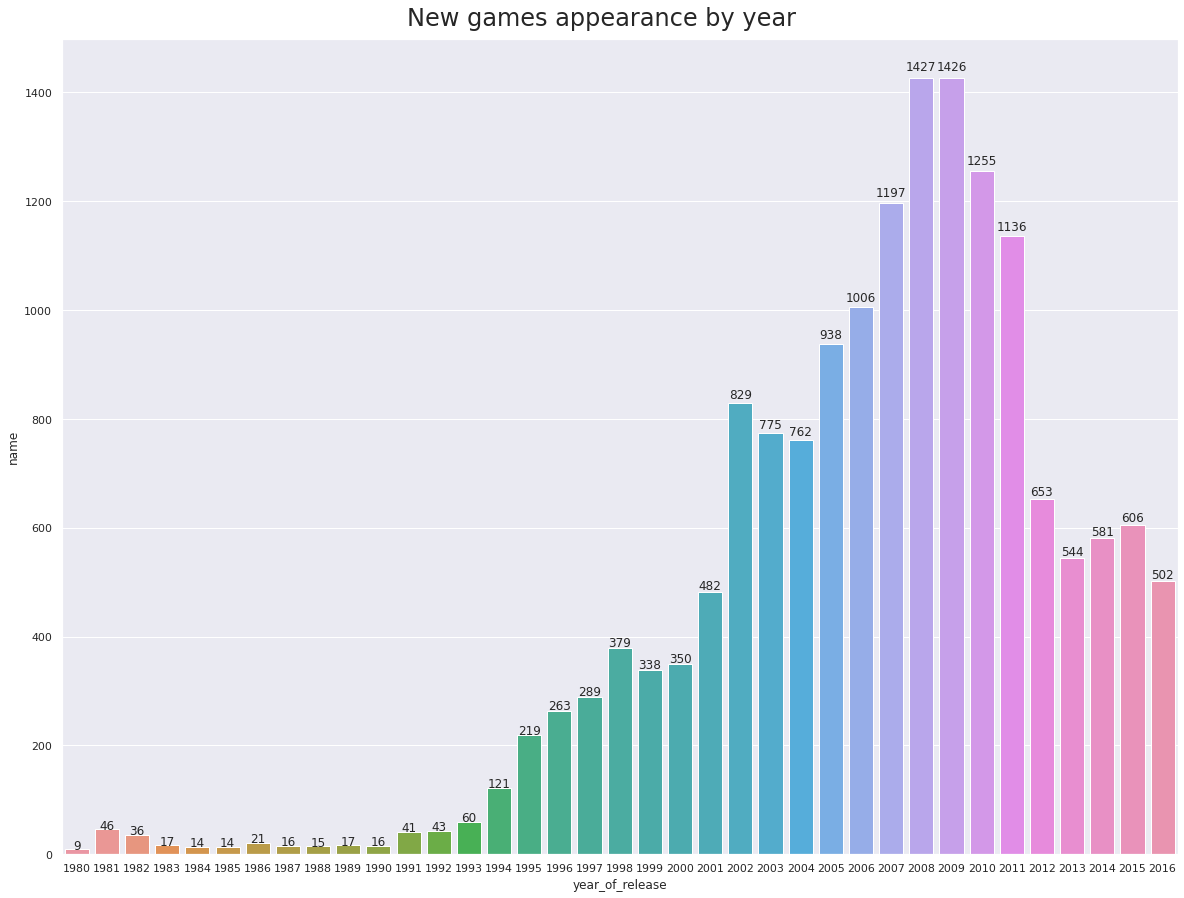

In [35]:
# Plotting a graph, showing the new games release per year for the whole period
yearly_release = data_games.pivot_table(
                                        index = ('year_of_release'), 
                                        values = 'name', 
                                        aggfunc = 'count').reset_index()
sns.set(rc={"figure.figsize":( 20 , 15 )})
years = sns.barplot(
                    data=yearly_release, 
                    x='year_of_release', 
                    y='name', 
                    ci=None)
plt.suptitle('New games appearance by year', y=0.91, fontsize=24)
show_values(years)

During the period of 2001 - 2013 more than 530 new games has been entering the market with the most busy years of 2008 (1416 new games) and 2009 (1422 new games). Since 2013 the average amount of new games is equal to 526 games and is more or less stable. Since the amount of new games, generating new revenue is the only parametr of evaluating of platform success available for us in this dataset we can limit the period starting from 2012 or 2013 for our further analysis (pending for further refinement based on additional parameters).  

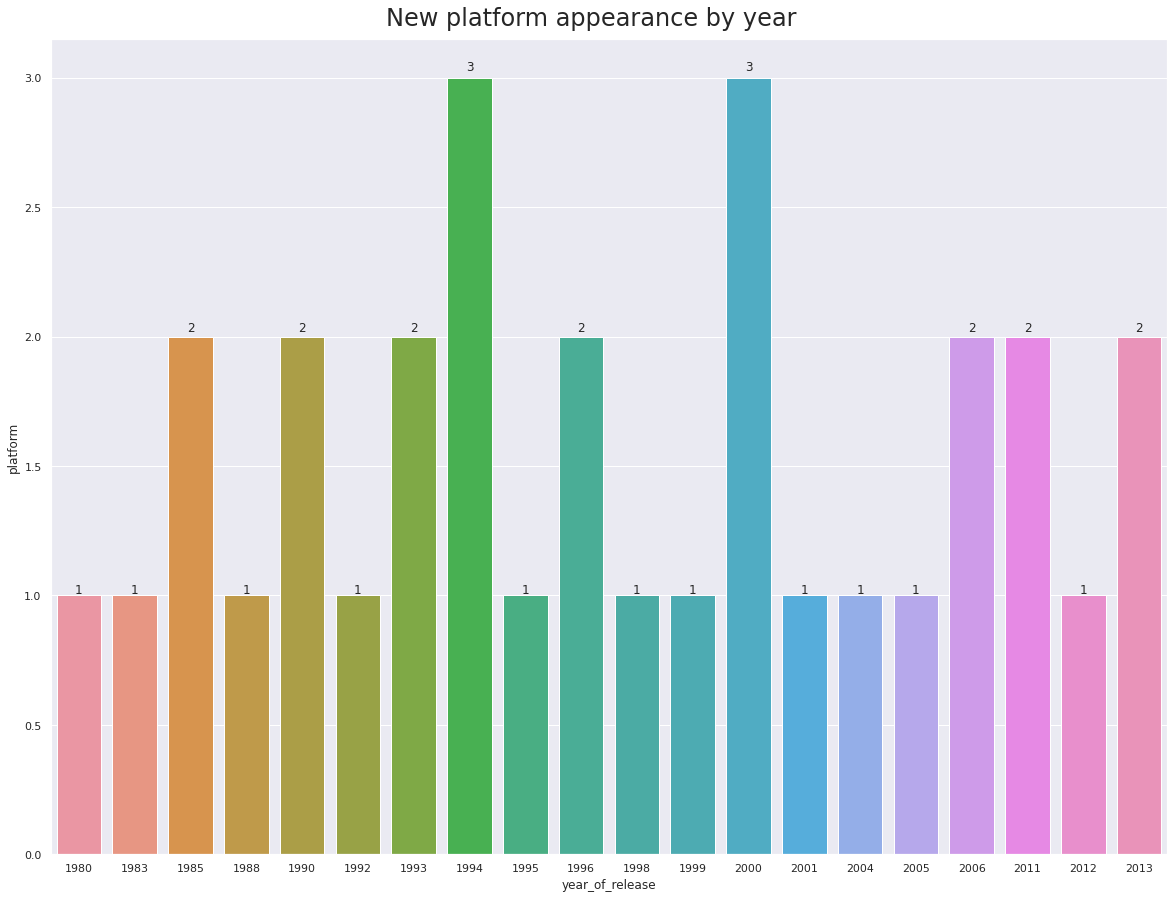

In [36]:
# Calculating the years each plattform appiered on the market

platform_first_year = data_games.query('first_year ==1').groupby(
    ['year_of_release', 'platform']).size().reset_index()
p_f_y_pivot = platform_first_year.pivot_table(
                                            index='year_of_release', 
                                            values='platform', 
                                            aggfunc='count').reset_index()

sns.set(rc={"figure.figsize":( 20 , 15 )})
years = sns.barplot(
                    data=p_f_y_pivot, 
                    x='year_of_release', 
                    y='platform', 
                    ci=None
)
plt.suptitle('New platform appearance by year', y=0.91, fontsize=24)
show_values(years)

New platforms enters the market in amount from 1 to 3 not each year. Last year 2 new platforms were released 2013. If any new platform(s) appears in 2017 it highly likely would not bring much revenue in the first year on the market.  

<div class="alert alert-success">
<b>Reviewer's comment:</b> Nice charts! Probaly they could be a little bit shorter to fit into my laptop screen or presentation slide :) 
</div>

### Distribution of sales between platforms

#### For the whole period

In [37]:
# Cheking for distribution of revenue between diferent platforms
platform_revenue = data_games.pivot_table(
                                        index='platform', 
                                        values='total_sales', 
                                        aggfunc='sum').reset_index()
platform_revenue = platform_revenue.set_index('platform').sum(
                    axis=1).nlargest(31).to_frame(name='total_revenue').reset_index()
platform_revenue['share'] = (platform_revenue['total_revenue'] / platform_revenue['total_revenue'].sum())*100
print(platform_revenue)

   platform  total_revenue      share
0       PS2        1233.56  13.997987
1      X360         961.24  10.907799
2       PS3         931.34  10.568505
3       Wii         891.18  10.112784
4        DS         802.78   9.109653
5        PS         727.58   8.256311
6       PS4         314.14   3.564746
7       GBA         312.88   3.550448
8       PSP         289.53   3.285480
9       3DS         257.81   2.925533
10       PC         255.76   2.902271
11       GB         254.43   2.887178
12      NES         251.05   2.848823
13       XB         249.61   2.832483
14      N64         218.01   2.473898
15     SNES         200.04   2.269981
16       GC         196.73   2.232420
17     XOne         159.32   1.807905
18     2600          86.48   0.981343
19     WiiU          82.19   0.932662
20      PSV          53.81   0.610616
21      SAT          33.59   0.381167
22      GEN          28.35   0.321705
23       DC          15.95   0.180995
24      SCD           1.86   0.021107
25       NG 

Six plattforms hold clear leadership holding more than 10% share of the market. For further analysis we can merge all platforms with less market shares to the 'other' category. 

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'other']


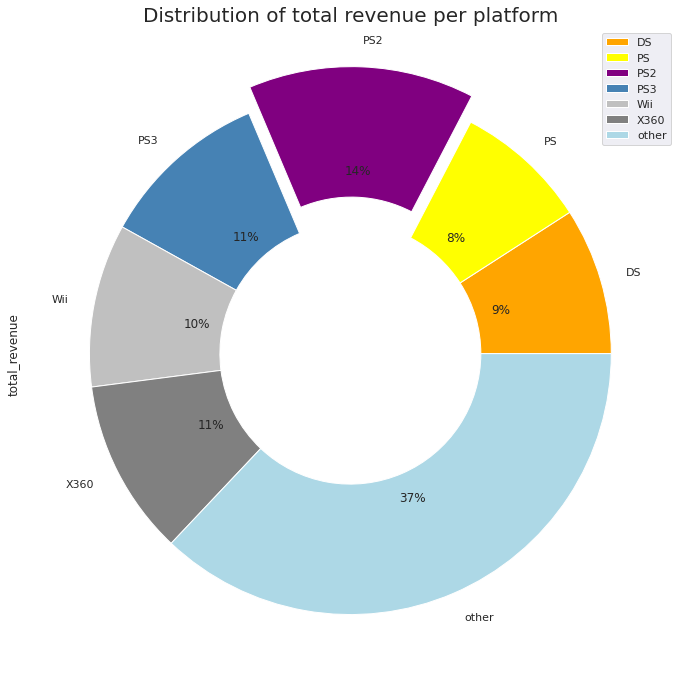

In [38]:
# Creating list of all platforms with regards to revenue
platform_list_alltimes = platform_revenue['platform'].tolist()
platform_top6_alltimes = platform_list_alltimes[:6]
platform_7_31_alltimes = platform_list_alltimes[6:]
platform_revenue['platform'] = platform_revenue['platform'].replace(platform_7_31_alltimes, 'other')

# Checking unique numbers
print(platform_revenue['platform'].unique())

# Plotting the distribution of total sales between platforms
my_colors_platform = ['orange', 'yellow', 'purple', 'steelblue', 'silver', 'grey', 'lightblue', 
                      'orangered', 'lightgreen', 'lightpink']
myexp_platforms = [0, 0, 0.1, 0, 0, 0, 0]
platform_revenue.groupby(['platform']).sum().plot(
                                                kind='pie', 
                                                y='total_revenue', 
                                                autopct='%1.0f%%', 
                                                figsize=(12, 12), 
                                                explode=myexp_platforms, 
                                                colors = my_colors_platform, 
                                                wedgeprops=dict(width=0.5)
)
plt.title("Distribution of total revenue per platform", fontsize=20)
plt.show()

The pie chart shows the disribution of the total revenue for all times and the PS2 as a leader, holding more than 14% of the market.
 

In [39]:
# Calculating the lifetime of 6 top plattforms on the market. 

top6_revenue = data_games.query('platform in @platform_top6_alltimes')
top_6_platforms_per_year = top6_revenue.pivot_table(
                                                    index = ['platform', 'year_of_release'], 
                                                    values = 'name', 
                                                    aggfunc = 'count').reset_index()

top_6_platforms_per_year.pivot_table(
                                    index='platform', 
                                    values='name', 
                                    aggfunc='count'
)       

,name
platform,
DS,11
PS,10
PS2,12
PS3,11
Wii,11
X360,12


In [40]:
print(f'Average lifetime across 6 most succefull platforms on the market: '
      f'{top_6_platforms_per_year.pivot_table(index="platform", values="year_of_release", aggfunc="count")["year_of_release"].mean().round(2)} years')

Average lifetime across 6 most succefull platforms on the market: 11.17 years


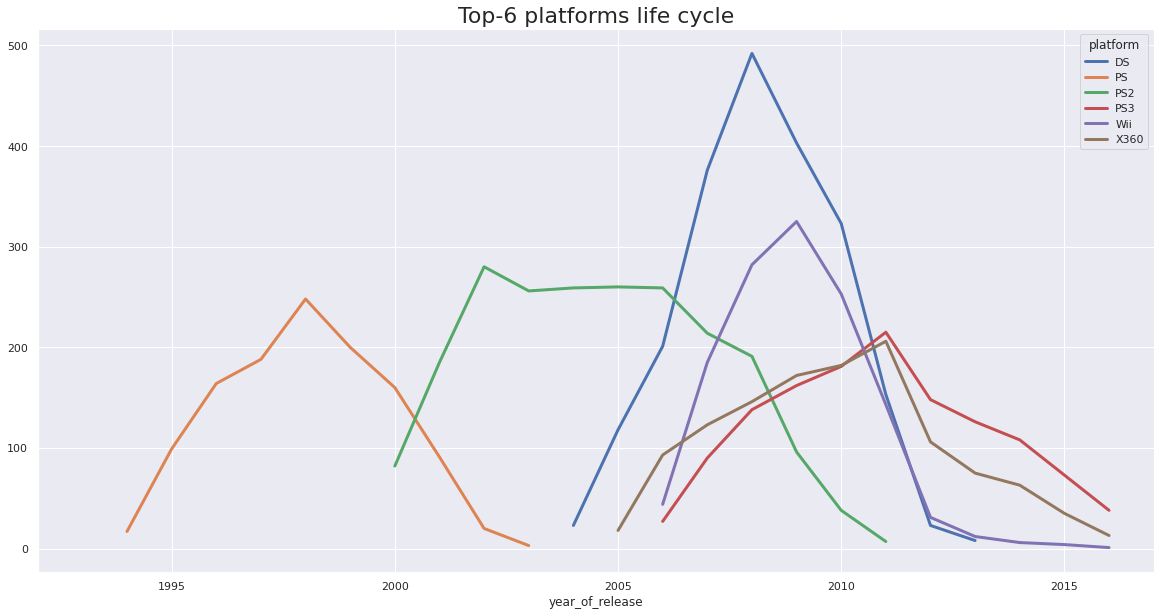

In [41]:
# Plotting the graph of the lifetime of 6 top platforms
data_games.query('platform in @platform_top6_alltimes').pivot_table(
                                                                    index='year_of_release', 
                                                                    columns='platform', 
                                                                    values='name', 
                                                                    aggfunc='count').plot(
                                                                                        kind='line', 
                                                                                        grid=True, 
                                                                                        figsize=(20,10), 
                                                                                        linewidth=3
)

# Decoration
plt.xlim(1992, 2017)
plt.title("Top-6 platforms life cycle", fontsize=22)
plt.show()

The average lifetime of the most succefull platform on the market is 11.2 years.   
  
The life cycle for all leading platforms (expept **PS2** and **Wii**) is more or less of the same symmetrical model: 4/5/6 of grow and then 5/6 years of fading.  
**PS2** platform had quick rise of 2  years to the maximum and then flat period of 4 years, followed by 5 years of fading.  
**Wii platform had assymetrical model of 3 years of growth to the maximum followed by 7 years of fading.  

By the end of 2016 all 6 most succefull platform in terms of total sales have already came to the end of their life cycle. The remaining two platforms, which will liklely to generate new games and new revenue in 2017 are **X360** and **PS3**. 
This means that we have to look for other platform while planning sales in forthcoming year of 2017.  
  
We should check for other sucsessful platforms which appeared on the market on or after 2012 and will be in the growth phase in 2017.  

#### For the period from 2012 to 2016

In [42]:
# Setting the relevant year for calculating the relevant period
relevant_year = 2012

# Creating the new dataframe for further analysis
data_games_relevant = data_games.query('year_of_release >= @relevant_year')

# Cheking for distribution of revenue between diferent platforms for relevant period
platform_revenue_relevant = data_games_relevant.pivot_table(
                                                            index='platform', 
                                                            values='total_sales', 
                                                            aggfunc='sum').reset_index()
platform_revenue_relevant = platform_revenue_relevant.set_index('platform').sum(
        axis=1).nlargest(31).to_frame(name='total_revenue').reset_index()
platform_revenue_relevant['share'] = (platform_revenue_relevant['total_revenue'] 
                                      / platform_revenue_relevant['total_revenue'].sum())*100
platform_relevant_list = platform_revenue_relevant['platform'].tolist()
print(platform_revenue_relevant)

   platform  total_revenue      share
0       PS4         314.14  21.716798
1       PS3         288.79  19.964328
2      X360         236.54  16.352236
3       3DS         194.61  13.453575
4      XOne         159.32  11.013944
5      WiiU          82.19   5.681873
6        PC          62.65   4.331054
7       PSV          49.18   3.399860
8       Wii          35.37   2.445162
9        DS          12.55   0.867593
10      PSP          11.19   0.773575


In the relevant period top-5 platforms changed and the new leaders, holding more than 10% of the market are:  
1. PS4  
2. PS3  
3. X360  
4. 3DS  
5. XOne


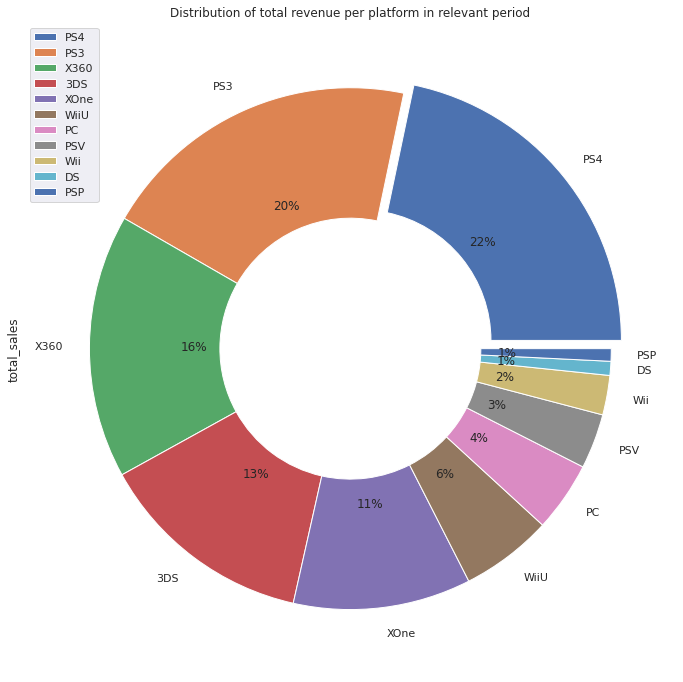

In [43]:
# Plotting the distribution of total sales between platforms in the relevant period
my_colors_platform = ['orange', 'yellow', 'purple', 'steelblue', 'silver', 'grey', 'lightblue', 
                      'orangered', 'lightgreen', 'lightpink']
myexp_platforms = [0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

platform_revenue_relevant = data_games_relevant.groupby(
    'platform')['total_sales'].sum().reset_index().sort_values(
    by='total_sales', ascending = False)
platform_revenue_relevant.set_index('platform', inplace=True)
platform_revenue_relevant.plot(
                                kind='pie', 
                                y='total_sales', 
                                autopct='%1.0f%%', 
                                figsize=(12, 12), 
                                explode=myexp_platforms, 
                                title='Distribution of total revenue per platform in relevant period',
                                wedgeprops=dict(width=0.5)
)
plt.show()

Pie chart shows the distribution of total sales between platforms in relevant period with PS4 and PS3 platforms on the 1st and 2nd place.

### Leading and weaking platforms

In order to make conclusion about forthcoming 2017 we need to know how platforms perform in the previous period (so called "relevant period") in terms of new games releases. More new games per each new year shows that the platform is gainig popularity and revenue, less game each year shows the end of life cycle of the platform nearing completion.   

platform         3DS  PC  PS3  PS4  PSV  Wii  WiiU  X360  XOne
year_of_release                                               
2016              46  54   38  164   85    1    14    13    87
      platform  year_of_release
0          Wii             2006
40         3DS             2011
185       WiiU             2012
256        PS3             2006
323        PS4             2013
493       XOne             2013
842       X360             2005
867        PSP             2004
1219       PSV             2011
14470       PC             1985
15957       DS             1985


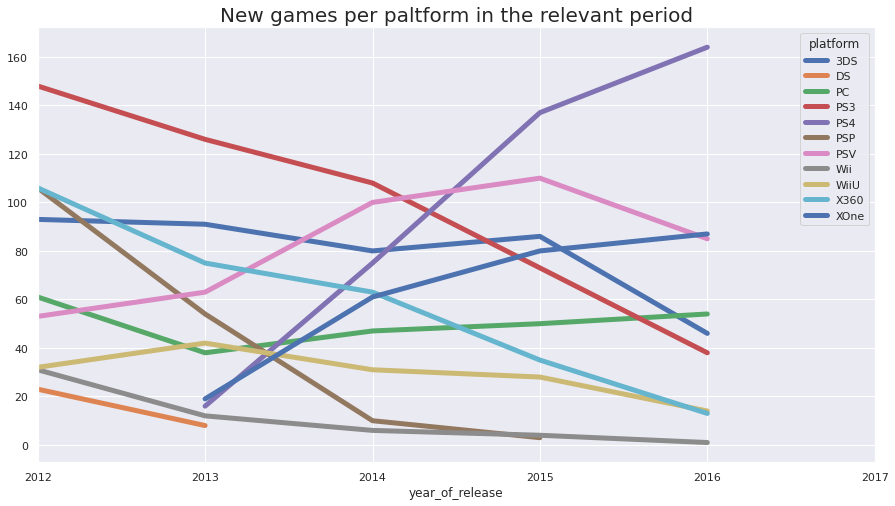

In [44]:
# Plotting the graph of the lifetime of platforms for the relevant period
data_games_relevant.pivot_table(
                                index='year_of_release', 
                                columns='platform', 
                                values='name', 
                                aggfunc='count').plot(
                                                    kind='line', 
                                                    grid=True, 
                                                    figsize=(15,8), 
                                                    linewidth=5
)

# Printing the amount of new games per platform in 2016
print(data_games_relevant.query('year_of_release == 2016').pivot_table(
                                                                        index='year_of_release', 
                                                                        columns='platform', 
                                                                        values='name', 
                                                                        aggfunc='count')
                                                                         )

# Printing the first year of platform appeared on the marlet
print(data_games.query('first_year == 1 and platform in @platform_relevant_list')[['platform', 'year_of_release']])

# Decoration
plt.xlim(2012, 2017)
plt.title("New games per paltform in the relevant period", fontsize=20)
plt.show()

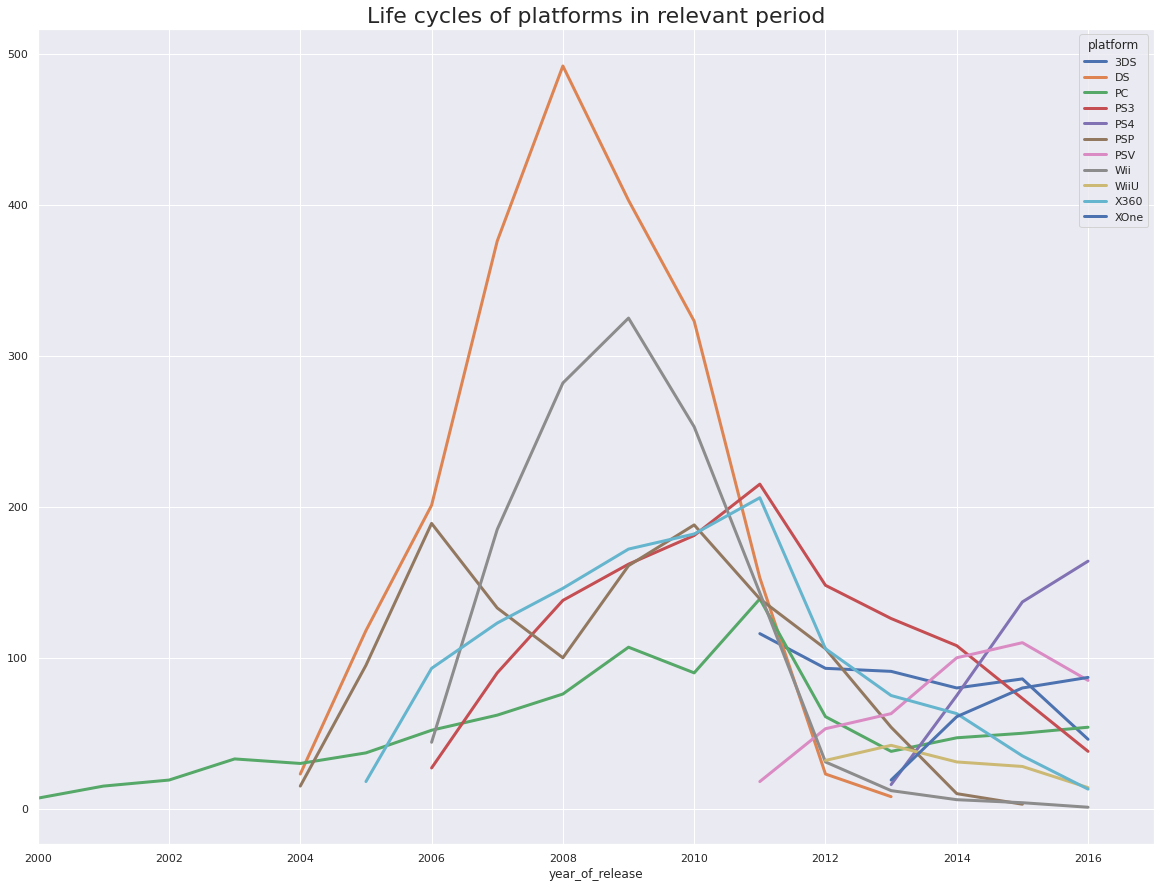

In [45]:
# Plotting the graph of the lifetime of leading platforms in the relevant period
data_games.query('platform in @platform_relevant_list and year_of_release >= 2000').pivot_table(
                                                                index='year_of_release', 
                                                                columns='platform', 
                                                                values='name', 
                                                                aggfunc='count').plot(
                                                                                    kind='line', 
                                                                                    grid=True, 
                                                                                    figsize=(20,15), 
                                                                                    linewidth=3
)

# Decoration
plt.xlim(2000, 2017)
plt.title("Life cycles of platforms in relevant period", fontsize=22)
plt.show()

Based on our conclusions from the previous period we have chosen 6 platforms which are likly to get new games released (generate new revenue) as follows: 
1. **PS4**, introduced in 2013,  is a clearly growing platform with growing number of new games and growing revenue by each year.
2. **PSV**, introdused in 2011, reached its maximum in 2015 and then began fading, but it will definitely generate revenue in 2017 more likely on the 2014 year level.
3. **XOne**, introduced in 2013 is also a clearly growing platform in the relevant period and expects to bring more revenue in 2017.
4. **PC**, introduced in 1985 with maximum popularity in 2011 has pretty stable amount of new games released from 2013 each year and we can expect the revenue in 2017 on the same level more o less. 
5. **3DS** (2011) and **PS3** introduced in 2006 and both reached their maximum in 2011 are the fading platforms but they can still generate a little revenue in 2017.  

All other platforms will highly likely totally fade by the end of 2017.  

### Global distribution of sales across of all plattforms

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64


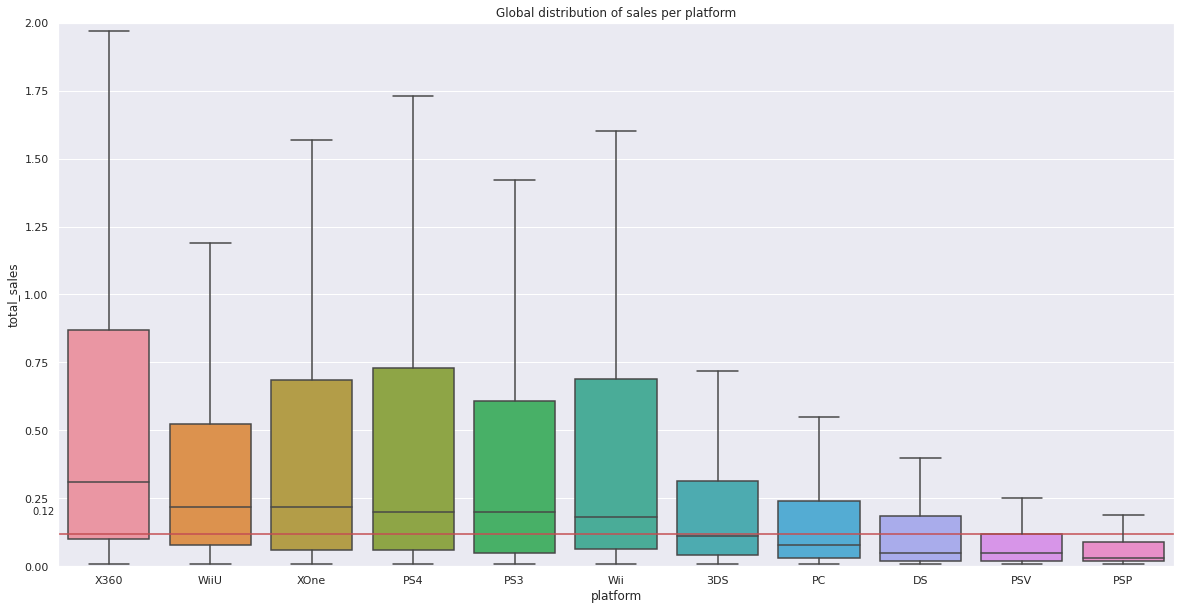

In [46]:
# Analyzing global sales of games per platform in the relevant period

platform_global_sales = data_games_relevant.pivot_table(
                                                        index='platform', 
                                                        values='total_sales', 
                                                        aggfunc='sum').reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0,2])
median_total = data_games_relevant['total_sales'].median().round(2)

# Adding horizontal line with median for total sales across all platforms
plt.axhline(y=median_total, color = 'r')
plt.text(x=-0.75, y=0.19, s=median_total, fontsize=10)

median = data_games_relevant.groupby('platform')['total_sales'].median().sort_values(ascending=False)
sns.boxplot(
            y=data_games_relevant['total_sales'], 
            x=data_games_relevant['platform'], 
            showfliers=False, 
            order=median.index).set(title="Global distribution of sales per platform")
print(data_games_relevant['total_sales'].describe())

The difference in lenghs of the upper (higher than 75%) and lower(lower than 25%) whiskers in each box shows us, that every platform has a number of the games with total_sales much higher, than the others, while the nunmber of less profitable games is much less. 

All platforms can be devided into two groups: 6 platforms have their median sales higher than 0.125 mln (median for total_sales of all platforms, red line) and five platforms have their median less, than total median.  

The biggest platforms with median sales are **X360**, **Xone** and **WiiU**, while for **PSV** and **PSP** 75% of per game sales is less, than total median across all platforms.

For the relevant period of 5 years we can see the big range of total sales between the platforms: from 11.005 mln (**PSP**) up to 308.96 mln (**PS4**).

### How users and professional reviews affect sales different platforms

In the relevant period top-5 platforms changed and the new leaders, holding more than 10% of the market are:  
1. PS4  
2. PS3  
3. X360  
4. 3DS  
5. XOne  
  
We will check the affect of users and professianals reviews on the total sales one by one.

#### Critic_score/user_score and total_sales correlation for PS4

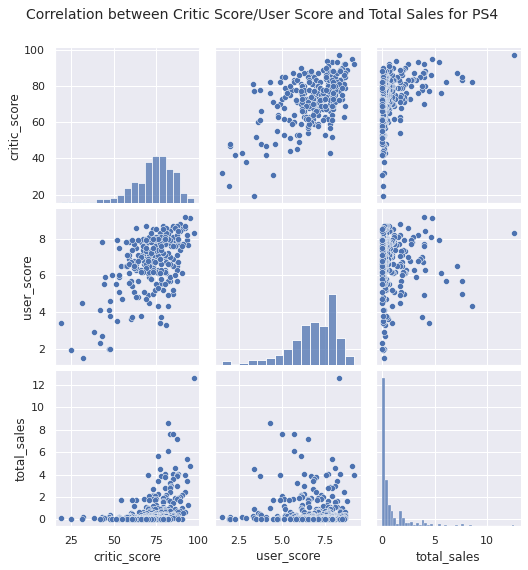

,critic_score,user_score,total_sales
critic_score,1.000000,0.561116,0.390665
user_score,0.561116,1.000000,-0.027596
total_sales,0.390665,-0.027596,1.000000


In [47]:
# Creating new dataframe for 'PS4' platform
data_ps4 = data_games.query('platform =="PS4" and critic_score != -1 and user_score != -1')[['critic_score', 
                            'user_score', 'total_sales']]

# Plotting scatter and calculating correlation between critic/user score and sales on XOne
sns.pairplot(data_ps4)
plt.suptitle('Correlation between Critic Score/User Score and Total Sales for PS4', y=1.05, fontsize=14)
plt.show()
data_ps4.corr()

One can see a weak positive correlation between professinal reviews and total sales and no correlation between users reviews and total sales for PS4 platform. 

#### Critic_score/user_score and total_sales correlation for PS3

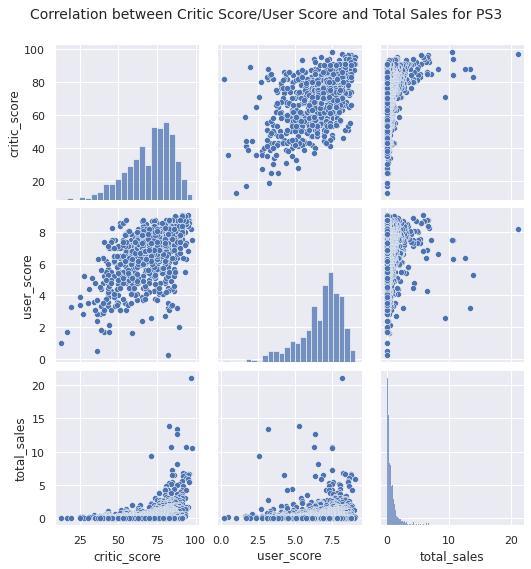

,critic_score,user_score,total_sales
critic_score,1.000000,0.557791,0.404961
user_score,0.557791,1.000000,0.125392
total_sales,0.404961,0.125392,1.000000


In [48]:
# Creating new dataframe for PS3
data_ps3 = data_games.query('platform =="PS3" and critic_score != -1 and user_score != -1')[['critic_score', 
                            'user_score', 'total_sales']]

# Plotting scatter and calculating correlation between critic score and sales on X360
sns.pairplot(data_ps3)
plt.suptitle('Correlation between Critic Score/User Score and Total Sales for PS3', y=1.05, fontsize=14)
plt.show()
data_ps3.corr()

One can see a weak positive correlation between professinal reviews and total sales and no correlation between users reviews and total sales for PS3 platform. 

#### Critic_score/user_score and total_sales correlation for X360

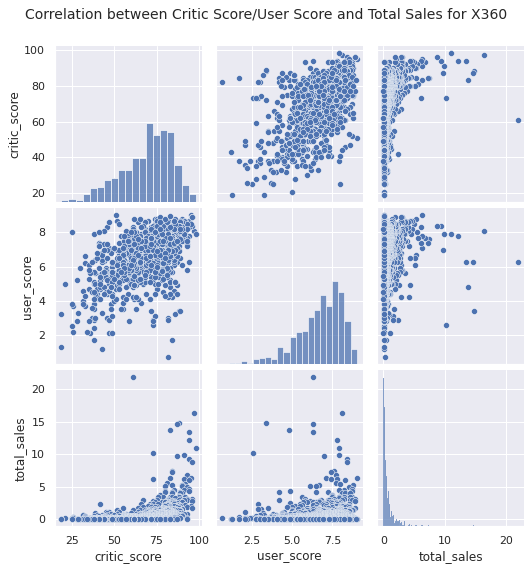

,critic_score,user_score,total_sales
critic_score,1.000000,0.552426,0.376773
user_score,0.552426,1.000000,0.105852
total_sales,0.376773,0.105852,1.000000


In [49]:
# Creating new dataframe for X360
data_x360 = data_games.query('platform =="X360" and critic_score != -1 and user_score != -1')[['critic_score', 
                            'user_score', 'total_sales']]

# Plotting scatter and calculating correlation between critic score and sales on X360
sns.pairplot(data_x360)
plt.suptitle('Correlation between Critic Score/User Score and Total Sales for X360', y=1.05, fontsize=14)
plt.show()
data_x360.corr()

One can see a very weak positive correlation between professinal reviews and total sales and no correlation between users reviews and total sales for X360 platform. 

#### Critic_score/user_score and total_sales correlation for 3DS

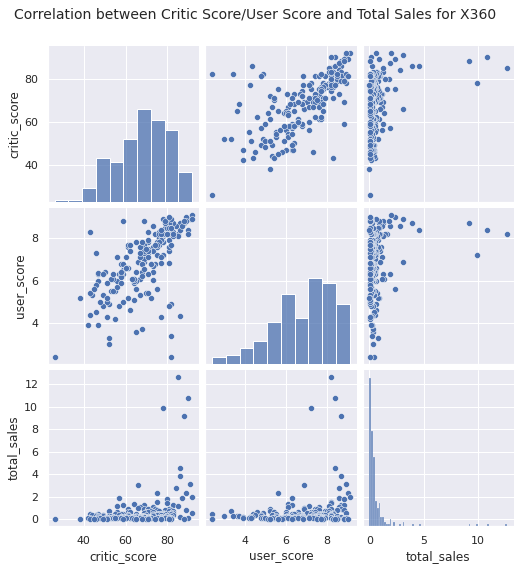

,critic_score,user_score,total_sales
critic_score,1.000000,0.634430,0.317034
user_score,0.634430,1.000000,0.226437
total_sales,0.317034,0.226437,1.000000


In [50]:
# Creating new dataframe for 3DS
data_3DS = data_games.query('platform =="3DS" and critic_score != -1 and user_score != -1')[['critic_score', 
                            'user_score', 'total_sales']]

# Plotting scatter and calculating correlation between critic score and sales on X360
sns.pairplot(data_3DS)
plt.suptitle('Correlation between Critic Score/User Score and Total Sales for X360', y=1.05, fontsize=14)
plt.show()
data_3DS.corr()

One can see a very weak positive correlation between professinal reviews and total sales and no correlation between users reviews and total sales for 3DS platform. 

#### Critic_score/user_score and total_sales correlation for XOne

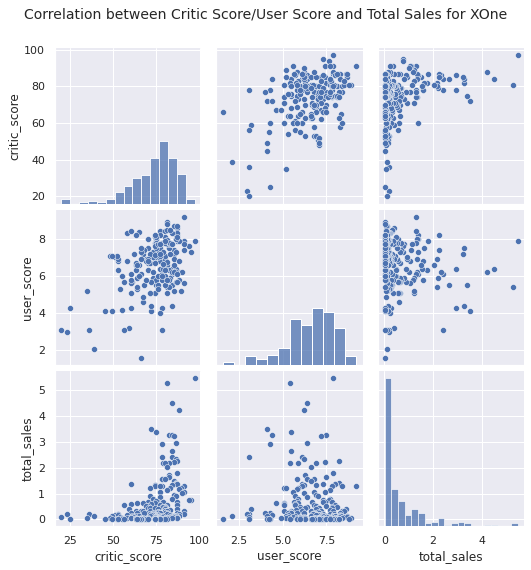

,critic_score,user_score,total_sales
critic_score,1.000000,0.466886,0.375089
user_score,0.466886,1.000000,-0.090951
total_sales,0.375089,-0.090951,1.000000


In [51]:
# Creating new dataframe for 'XOne' platform
data_xone = data_games.query('platform =="XOne" and critic_score != -1 and user_score != -1')[
            ['critic_score', 'user_score', 'total_sales']]

# Plotting scatter and calculating correlation between critic/user score and sales on XOne
sns.pairplot(data_xone)
plt.suptitle('Correlation between Critic Score/User Score and Total Sales for XOne', y=1.05, fontsize=14)
plt.show()
data_xone.corr()

One can see a very weak positive correlation between professinal reviews and total sales and no correlation between users reviews and total sales for X360 platform. 

For all top-5 platforms we found out almost no correlation between users reviews and total sales, while there is a weak to very weak correlation between total sales and professional reviews. 

### Sales of the top-5 games on different platforms

We will calculate top-5 games in terms of total sales and calculate distribution of the revenues per each platform.

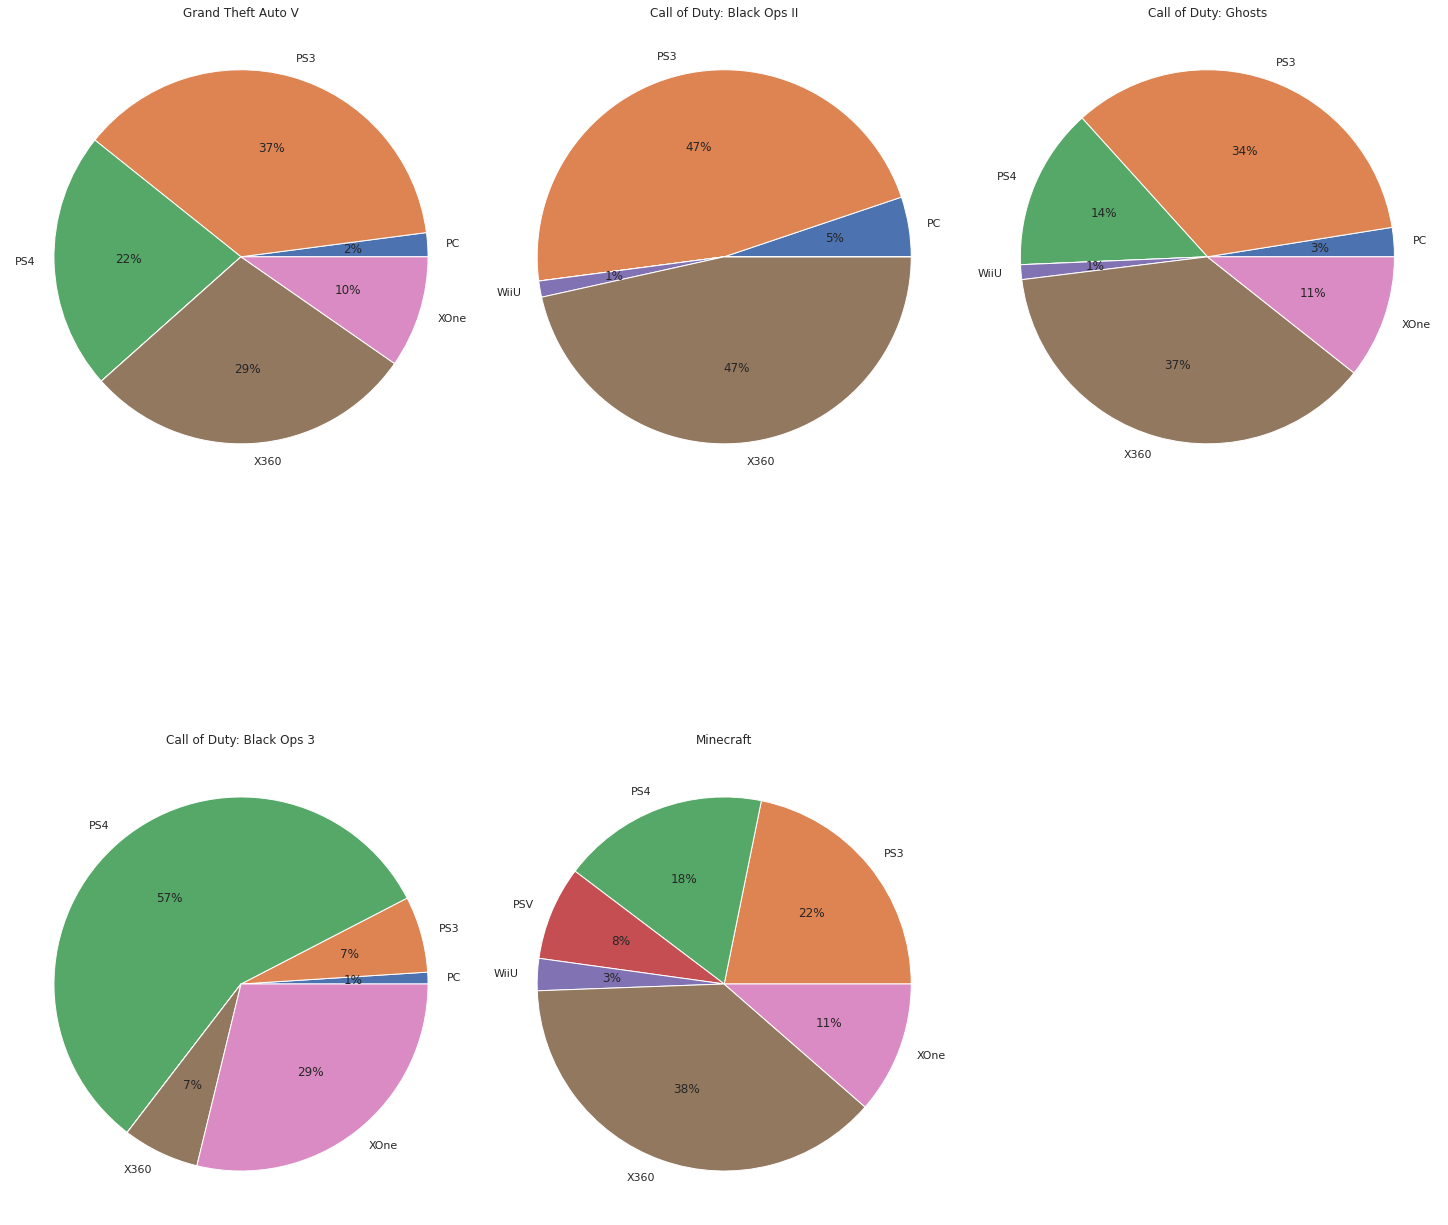

In [52]:
# Calculating top-5 games in total sales
game_top5_rev = data_games_relevant.pivot_table(
                                                index='name', 
                                                columns='platform',
                                                values ='total_sales', 
                                                aggfunc='sum',
                                                fill_value = 0, 
                                                margins = True).sort_values(
                                                                            by = "All", 
                                                                            ascending = False).head(6)


# Replacing the totals and columns with 0 value 
game_top5_rev = game_top5_rev.drop('All', axis=1)
game_top5_rev = game_top5_rev[game_top5_rev.index != "All"]
game_top5_rev = game_top5_rev.drop(game_top5_rev.columns[(game_top5_rev == 0).all()], axis=1)

# Transpose the pivot and creating variables for names of the platforms and games
game_top5_rev = game_top5_rev.T
games = game_top5_rev.columns
platforms = game_top5_rev.index

# Defining the function which hides values less than 1%
def my_autopct(pct):
    return '%1.0f%%' % pct if pct > 1 else ''

# Plotting the pie diagrams
fig, axs = plt.subplots(2, 3, figsize=(20,20), constrained_layout=True)
axs = axs.ravel()
for i, game in enumerate(games):
    values = game_top5_rev[game]
    labels = platforms
    autopct_fmt = lambda x: my_autopct(x) if x > 1 else ''
    labels = np.where(values > 0, labels, '')
    axs[i].pie(values, labels=labels, autopct=autopct_fmt)
    axs[i].set_title(game)
plt.delaxes(axs[5])

Pie charts combined on one graph make it cleary visibale that the most profitable games have different sales distribution on different platforms. Sony PlayStation platforms are prevaling in 2 of 5 most popular games - "Grand Theft Auto 5" (59%) and "Call of Duty: Black Ops 3" (64%), for 3 games there is equality in shares with Microsoft (X360 & XOne) - "Call of duty: Ghost" (48%/48%) and "Minecraft" (48%/49%) and "Call of Duty: Black Ops II" (47%/47%).  
In general we can say that for the most profitable games Sony PS platforms are leading ones. 


### Distribution of games by genre

#### For the whole period

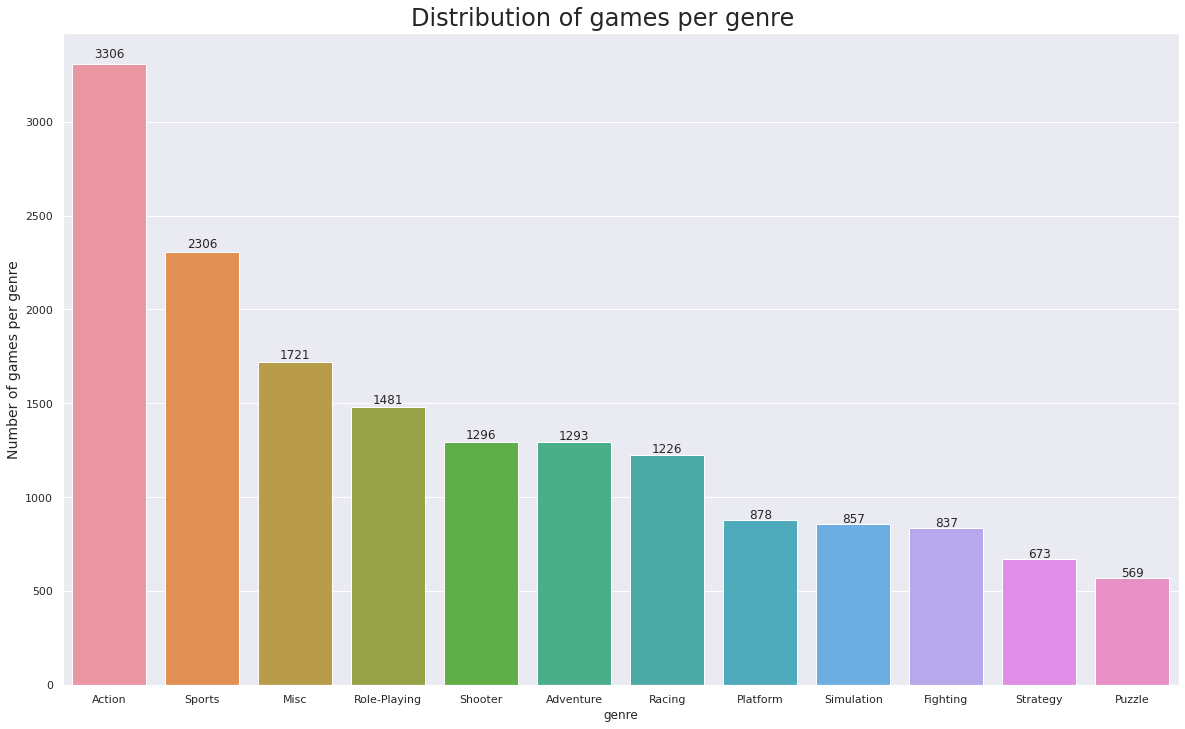

In [53]:
# Distribution of games by genre
game_genre = data_games.pivot_table(
                                    index='genre', 
                                    values='name', 
                                    aggfunc='count').reset_index()
game_genre = game_genre.set_index('genre').sum(axis=1).nlargest(12).to_frame(
            name='amount_of_games').reset_index()

# Plotting the chart with distribution of games by genre
sns.set(rc={"figure.figsize":( 20 , 12 )})
genres_games = sns.barplot(data=game_genre, x='genre', y='amount_of_games')
show_values(genres_games)
ax = plt.gca()
ax.set_ylabel('Number of games per genre', fontsize=14)
plt.suptitle('Distribution of games per genre', y=0.91, fontsize=24)
plt.show()

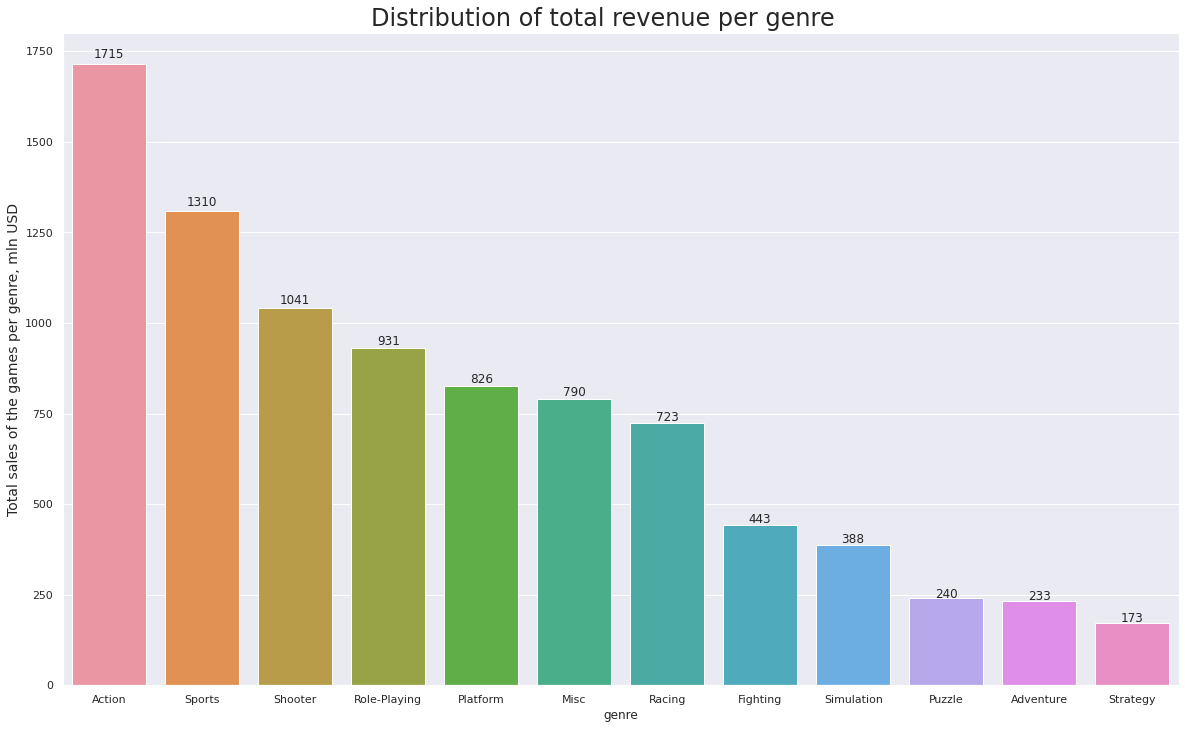

In [54]:
# Calculating distribution of revenue per genre
genre_rev = data_games.pivot_table(
                                    index='genre', 
                                    values='total_sales', 
                                    aggfunc='sum').reset_index()
genre_rev = genre_rev.set_index('genre').sum(
            axis=1).nlargest(12).to_frame(name='total_sales').reset_index()

# Plotting the chart with distribution of revenu by genre
genres_rev = sns.barplot(data=genre_rev, x='genre', y='total_sales')
plt.suptitle('Distribution of total revenue per genre', y=0.91, fontsize=24)
ax = plt.gca()
ax.set_ylabel('Total sales of the games per genre, mln USD', fontsize=14)
show_values(genres_rev)
plt.show()

<div class="alert alert-danger">
<s><b>Reviewer's comment: </b> Please, specify units for Y axis.
</div>

#### For the period from 2012 till 2016

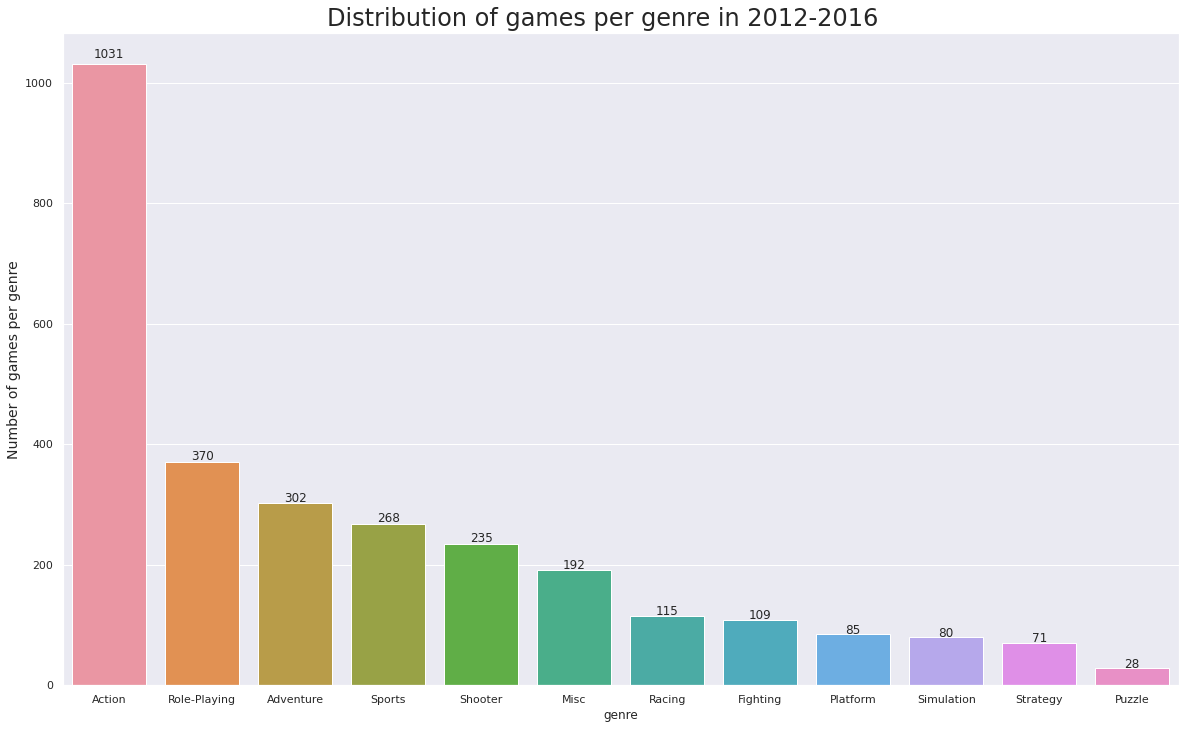

In [55]:
# Calculating distribution of games by genre for the relevant period
game_genre_relevant = data_games_relevant.pivot_table(
                                                        index='genre', 
                                                        values='name', 
                                                        aggfunc='count').reset_index()
game_genre_relevant = game_genre_relevant.set_index('genre').sum(
                        axis=1).nlargest(12).to_frame(name='amount_of_games').reset_index()

# Plotting the chart with distribution of games by genre for the relevant period
sns.set(rc={"figure.figsize":( 20 , 12 )})
genres_games_relevant = sns.barplot(data=game_genre_relevant, x='genre', y='amount_of_games')
show_values(genres_games_relevant)
ax = plt.gca()
ax.set_ylabel('Number of games per genre', fontsize=14)
plt.suptitle('Distribution of games per genre in 2012-2016', y=0.91, fontsize=24)
plt.show()

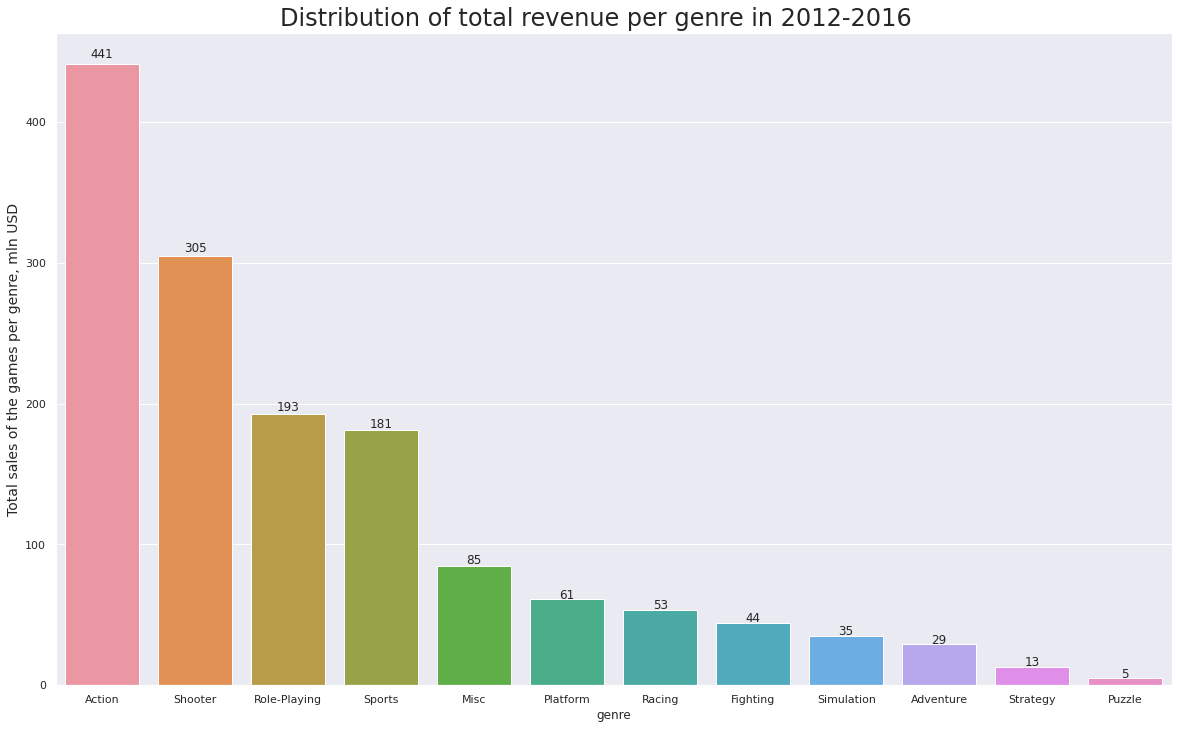

In [56]:
# Calculating distribution of revenue per genre
genre_rev_relevant = data_games_relevant.pivot_table(
                                                    index='genre', 
                                                    values='total_sales', 
                                                    aggfunc='sum').reset_index()
genre_rev_relevant = genre_rev_relevant.set_index('genre').sum(
                    axis=1).nlargest(12).to_frame(name='total_sales').reset_index()

# Plotting the chart with distribution of revenu by genre
genres_rev_rel = sns.barplot(data=genre_rev_relevant, x='genre', y='total_sales')
plt.suptitle('Distribution of total revenue per genre in 2012-2016', y=0.91, fontsize=24)
ax = plt.gca()
ax.set_ylabel('Total sales of the games per genre, mln USD', fontsize=14)
show_values(genres_rev_rel)
plt.show()

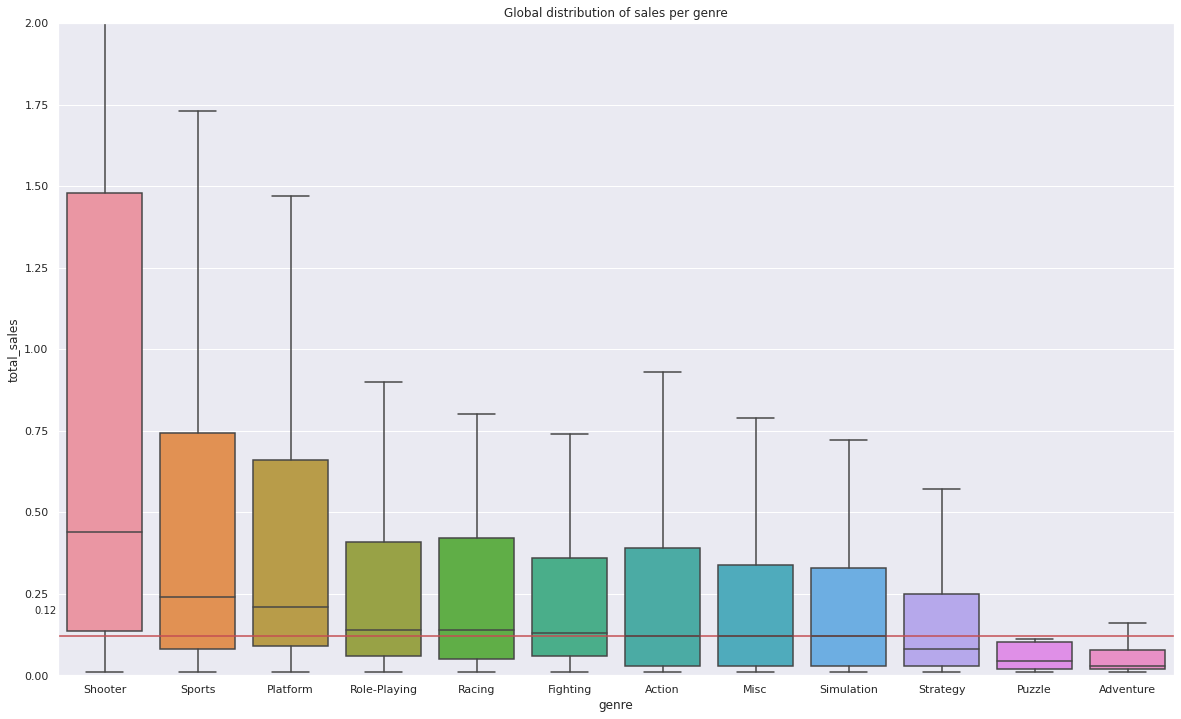

In [57]:
# Analyzing global sales of games per genre

platforms_global_sales_rel = data_games_relevant.pivot_table(
                                                            index='platform', 
                                                            values='total_sales', 
                                                            aggfunc='sum').reset_index()

median_total = data_games_relevant['total_sales'].median().round(2)

plt.ylim([0, 2])
median = data_games_relevant.groupby('genre')['total_sales'].median().sort_values(ascending=False)
sns.boxplot(
            y=data_games_relevant['total_sales'], 
            x=data_games_relevant['genre'],
            showfliers=False, 
            order=median.index ).set(title="Global distribution of sales per genre")

# Adding horizontal line with median for total sales across all genres
plt.axhline(y=median_total, color = 'r')
plt.text(x=-0.75, y=0.19, s=median_total, fontsize=10)
plt.show()

We can conclude, that 6 genres - Shooter, Sports, Platform, Fiting, Role-Playing and Racing have median higher then total median across all genres and this genres may be considered as the most profitable ones. Actions, Simulations, Strategy, Puzzle and Adventure are much less profitable, havine median sales less than total median. Puzzle and Adventure are two least profitable genres, Puzzle total sales are even less then total median.  
Like the situation with the platforms the upper whickeys shows us tha that all genres (except Puzzle) have the games, that are much more profitable, then the majority of the games oа this particular genre.  
  
Shooter genre consits of the most profitable games, with median value around two times higher than the nearest genre. But in terms of global sales Shooter occupies only second place, following Action (approximately one and a half less revenue). Taking into consideration the  the ratio of the number of games in both genres (1002 for Action vs only 234 for Shooter) me can say that games in Shooter genre are really the most profitable on the market, while games in Action genre are below the total median in terms of revenue.  

## User profile for the regions

We will create user profiles for each region (North America, European Union and Japan). 

For each region there will be determined:  
- TOP 5 platforms  
- TOP 5 genres  

And aftewords we have to determing whether ESRB ratings affect sales in individual regions.

#### North America (NA)

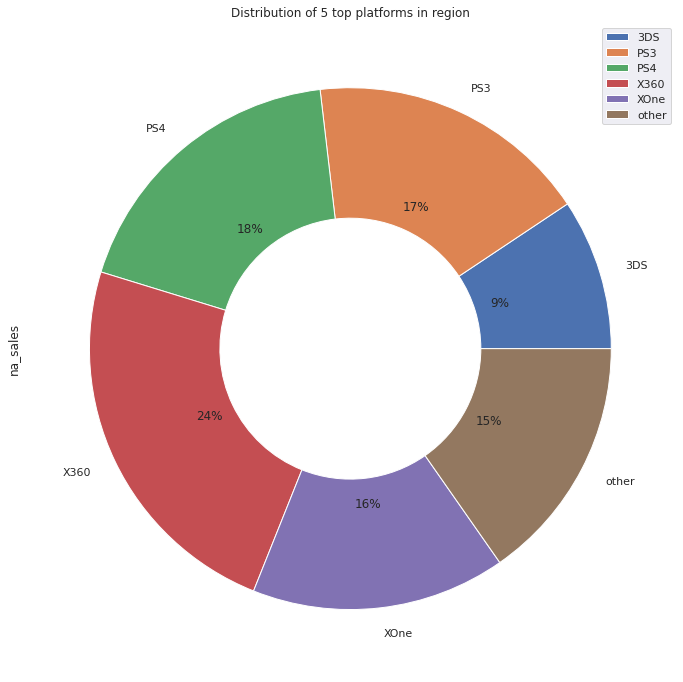

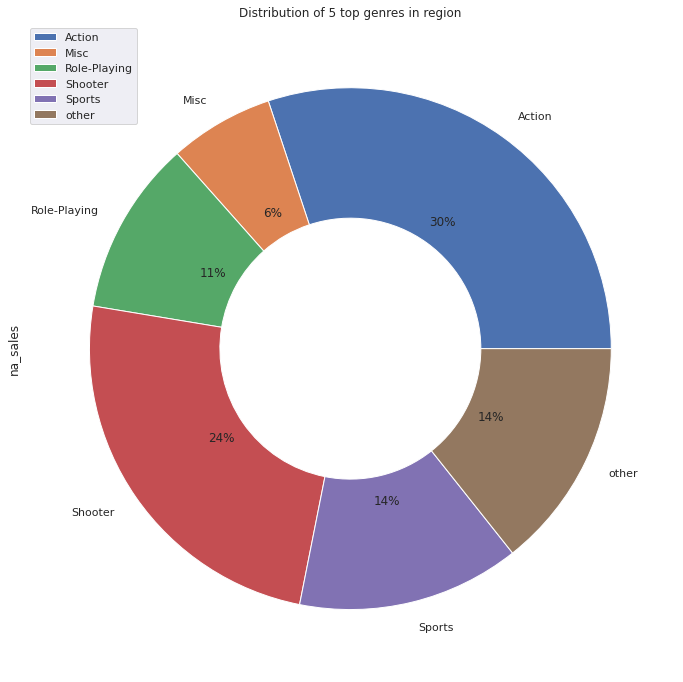

In [58]:
# Defining function for 5 top platforms in region
def top_5_platforms(region):
    platform = region+'_platform'
    platform_list = region+'_platform_list'
    sales = region+'_sales'
    platform_other = region+'_platform_other'
    platform = data_games_relevant.groupby('platform')[sales].sum().reset_index().sort_values(by=sales, 
                ascending = False)
    platform_list = platform['platform'].tolist()
    platform_other = platform_list[5:]
    platform['platform'] = platform['platform'].replace(platform_other, 'other')
    platform.groupby(['platform']).sum().plot(
                                                kind='pie', 
                                                y=sales, 
                                                autopct='%1.0f%%', 
                                                figsize=(12, 12), 
                                                title='Distribution of 5 top platforms in region', 
                                                wedgeprops=dict(width=0.5)
)
top_5_platforms('na')

# Defining function for 5 top genres in region
def top_5_genres(region):
    genre = region+'_genre'
    genre_list = region+'_genre_list'
    sales = region+'_sales'
    genre_other = region+'_genre_other'
    genre = data_games_relevant.groupby('genre')[sales].sum().reset_index().sort_values(by=sales, 
                ascending = False)
    genre_list = genre['genre'].tolist()
    genre_other = genre_list[5:]
    genre['genre'] = genre['genre'].replace(genre_other, 'other')
    genre.groupby(['genre']).sum().plot(
                                        kind='pie', 
                                        y=sales, 
                                        autopct='%1.0f%%', 
                                        figsize=(12, 12), 
                                        title='Distribution of 5 top genres in region', 
                                        wedgeprops=dict(width=0.5))
top_5_genres('na')

Top-5 platforms in North America are X360 (24%), PS4 (18%), PS3 (17%), XOne (16%), and 3DS (9%)
Top-5 genres in North America are Action (31%), Shooter (25%), Sports (14%), Role_Playing (10%), and Misc (7%)

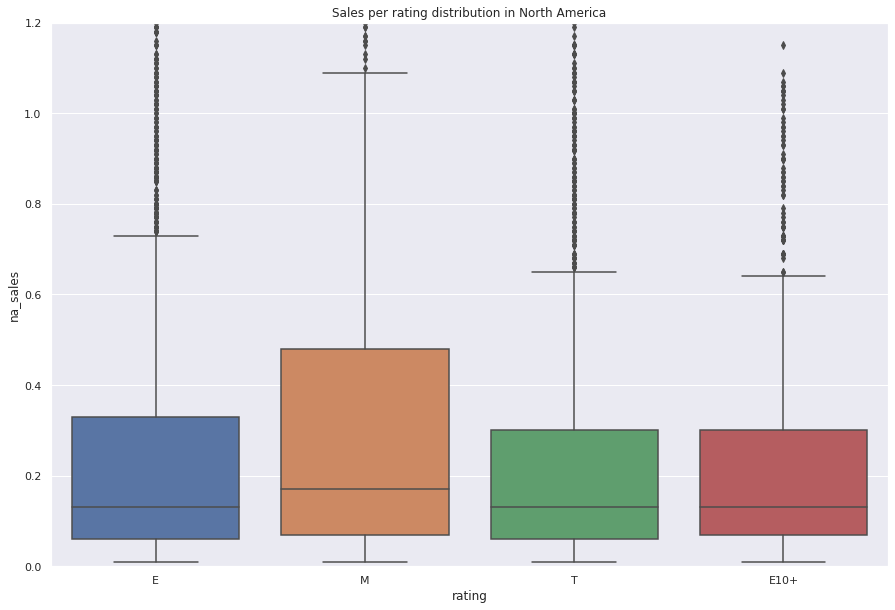

In [59]:
# Correlation between sales and ESRB ration in NA
na_esrb = data_games.query('na_sales > 0 and rating != "unknown"')[['platform', 'rating', 'na_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim([0, 1.2])
sns.boxplot(
            y=na_esrb['na_sales'], 
            x=na_esrb['rating']).set(title="Sales per rating distribution in North America")
plt.show()

For North America **"M"** rating (over 17) games are leading in terms of sales (revenue), followed by **"E"** rating. Other two ratings (**T** and **E-10**) are pretty much the same per rating category.

#### European Union (EU) 

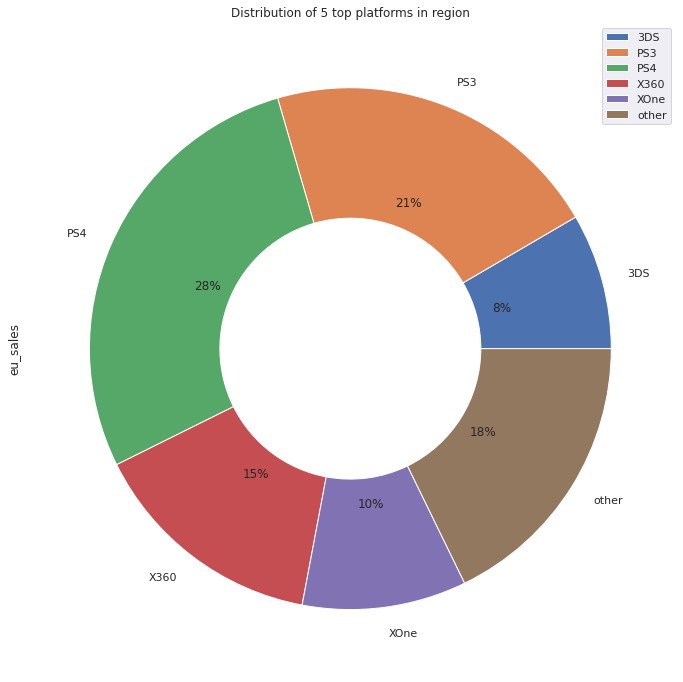

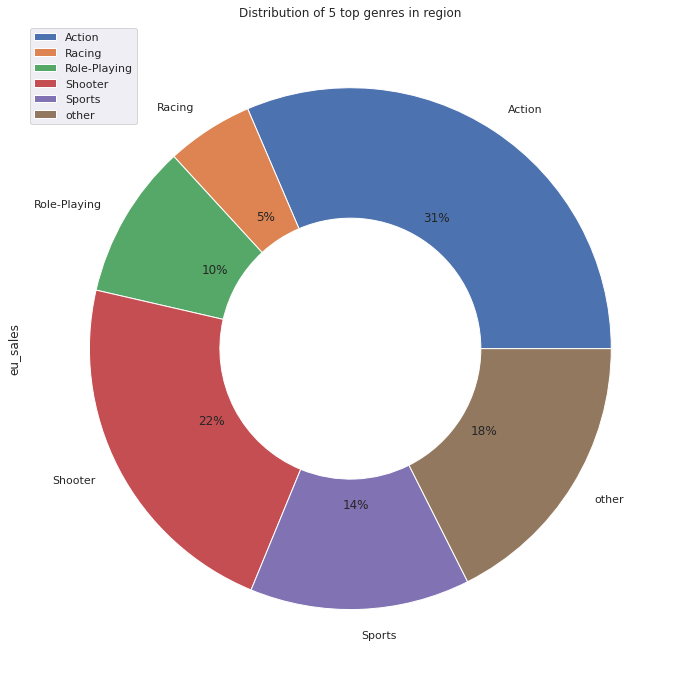

In [60]:
# Plotting pie charts top 5 platform and regions in Eurioean Market
top_5_platforms('eu')
top_5_genres('eu')

Top-5 platforms in European Union are PS4 (28%), PS3 (21%), X360 (15%), XOne (10%), and 3DS (89%)
Top-5 genres in European Union are Action (32%), Shooter (23%), Sports (13%), Misc (5%), and Platform (4%)

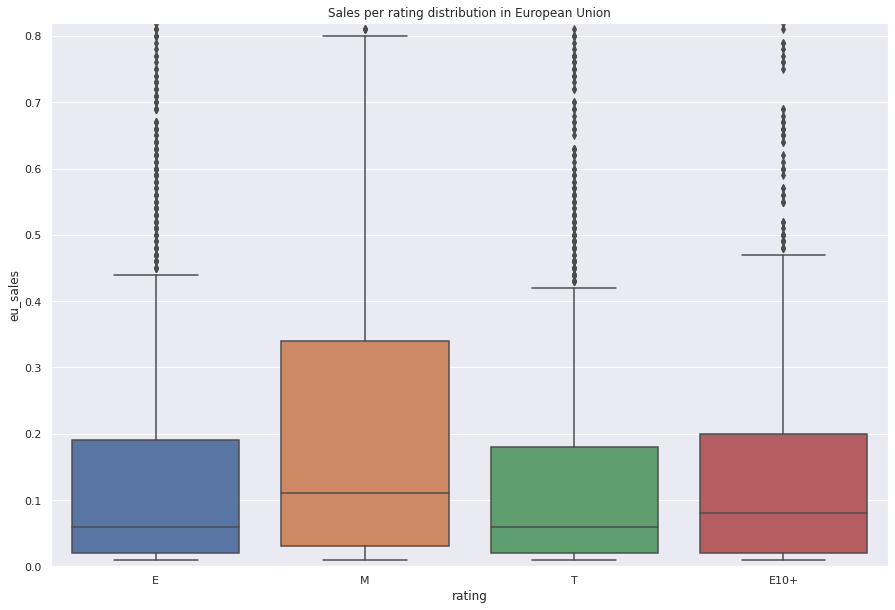

In [61]:
# Correlation between sales and ESRB ration in European Union
eu_esrb = data_games.query('eu_sales > 0 and rating != "unknown"')[['platform', 'rating', 'eu_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim([0, 0.82])
sns.boxplot(
            y=eu_esrb['eu_sales'], 
            x=eu_esrb['rating']).set(title="Sales per rating distribution in European Union")
plt.show()

For Uuropean Union we have the same situation: **"M"** rating games are leading in terms of sales (revenue), followed by **E-10**, **E** and **T** ratings.

### Japan (JP)

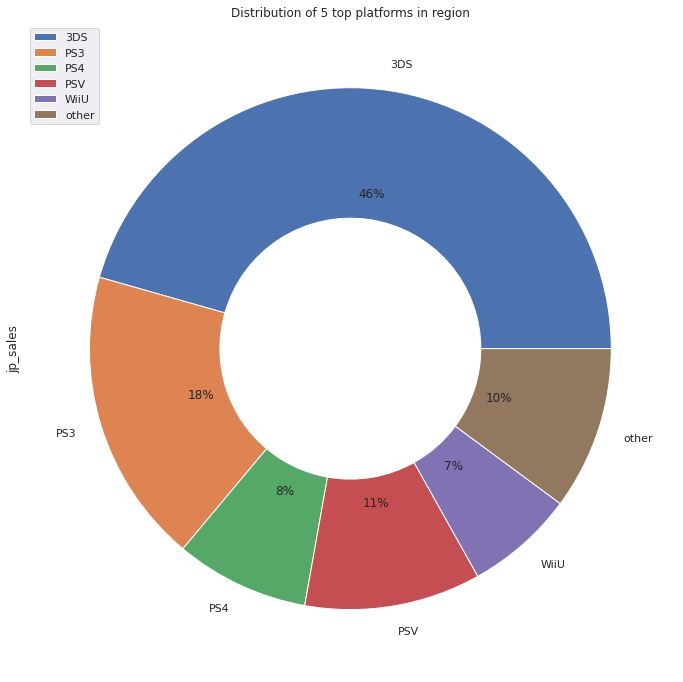

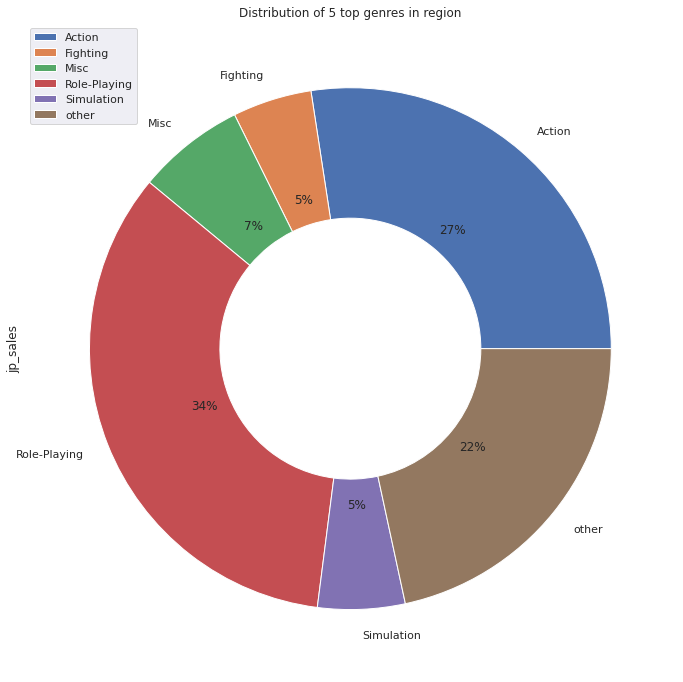

In [62]:
# Plotting pie charts top 5 platform and regions in Eurioean Market
top_5_platforms('jp')
top_5_genres('jp')

Top-5 platforms in Japan are 3DS (45%), PS3 (18%), PSV (11%), PS4 (8%), and WiiU (7%)
Top-5 genres in Japan Union are Role-Playing (32%), Action (28%), Misc (7%), Simulation (6%), and Fighting (5%).

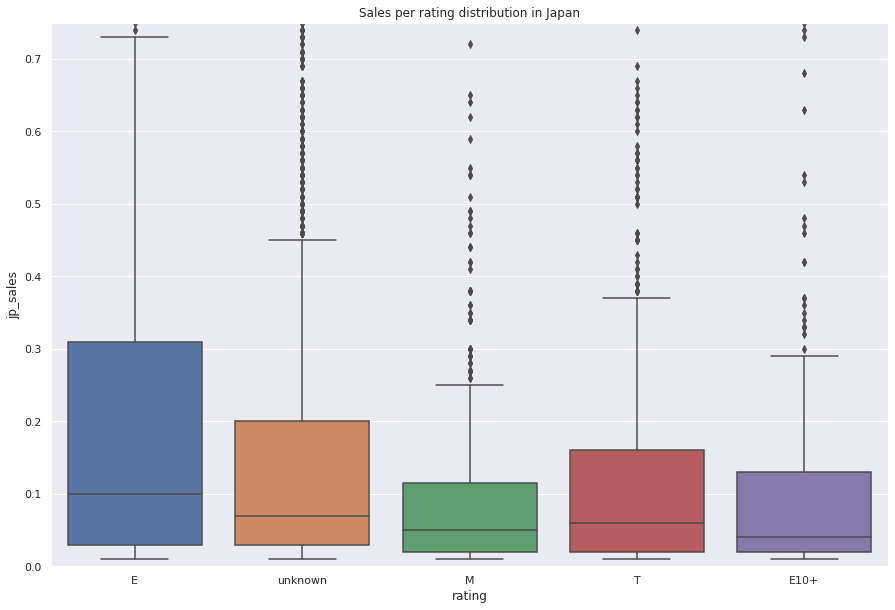

In [63]:
# Correlation between sales and ESRB ration in Japan
jp_esrb = data_games.query('jp_sales > 0')[['platform', 'rating', 'jp_sales']]
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim([0, 0.75])
sns.boxplot(
            y=jp_esrb['jp_sales'], 
            x=jp_esrb['rating']).set(title="Sales per rating distribution in Japan")
plt.show()

In Japan the situation is different: **"E"** rating games are leading in terms of sales (revenue), following by **'unknown'**, **T**, and **"E-10"**, while **"M"** occupies the last place.


## Testing hypotheses

### Average user ratings of the Xbox One and PC platforms are the same  

Now we can test the hypothesis that Average user ratings of the Xbox One and PC platforms are the same.

To perform statistical tests we need to formulate the nuul and alternative hypotheses as follows:  

**Null hypothesis** is that the difference in average user ratings of the Xbox One and PC platforms is statistically insignificant  
**Alternative hypothesis** is that  The difference in average user ratings of the Xbox One and PC platforms is statistically significant.

For testing hypothesis we will use Student test to compare the average ratings from both regions. We will check if our samples are of the same size to decide about the equal_var value and will set the aplpha value to 0.05 first and then will check if such difference is good enoughe to make the conclusion on null and alternative hypothesis.

In [64]:
# Making new dataframes for XOne and PC platforms and user score 
data_user_xone = data_games_relevant.query('platform == "XOne" and user_score != -1')['user_score']
data_user_pc = data_games_relevant.query('platform == "PC" and user_score != -1')['user_score']

# Cheking statisticks for both dataframes
print('Statistics for XOne user_score dataset:')
print(data_user_xone.describe())
print()
print('Statistics for PC user_score dataset:')
print(data_user_pc.describe())
print()
print(f'Variance for user_score of XOne platform: ', data_user_xone.var())
print(f'Variance for user_score of PC platform: ', data_user_pc.var())

Statistics for XOne user_score dataset:
count    205.000000
mean       6.594837
std        1.375068
min        1.600000
25%        5.800000
50%        6.800000
75%        7.700000
max        9.200000
Name: user_score, dtype: float64

Statistics for PC user_score dataset:
count    210.000000
mean       6.431603
std        1.672014
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Variance for user_score of XOne platform:  1.890813018093416
Variance for user_score of PC platform:  2.7956312824991776


In [65]:
# Performing statictical tests

alpha=0.05
results = st.ttest_ind(data_user_xone, data_user_pc, equal_var=False)
print(f'p-value: {results.pvalue:.2%}')

if results.pvalue < alpha:
    print('We reject the null hypthesis. Average user ratings of the Xbox One and PC platforms differ from each other.')
else:
    print('We cannot reject the null hypthesis')



p-value: 27.75%
We cannot reject the null hypthesis


Our null hypothyses is true. With lagre probability of 27.75% difference between users score of XOne and PC platforms is statistically insignificant.

### Average user ratings of the Action and Sports genres are different.

Now we can test the hypothesis that user rating of the Action and Sports genres are different.

To perform statistical tests we need to formulate the nuul and alternative hypotheses as follows:

**Null hypothesis**:  Difference in average user scores for the Action and Sports genres is statistically insignificant.  
**Alternative hypothesis**: Difference in average user scores for the Action and Sports genres is statistically significant.

For testing hypothesis we will use Student test to compare the average ratings from both regions. We will check if our samples are of the same size to decide about the equal_var value and will set the aplpha value to 0.05 first and then will check if such difference is good enoughe to make the conclusion on null and alternative hypothesis.

In [66]:
# Creating new rataframes for Action and Sports genre
data_user_action = data_games_relevant.query('genre == "Action" and user_score != -1')['user_score']
data_user_sports = data_games_relevant.query('genre == "Sports" and user_score != -1')['user_score']
# Checking statistics for the genres
print('Statistics for Action user_score dataset:')
print(data_user_action.describe())
print()
print('Statistics for Sports user_score dataset:')
print(data_user_sports.describe())
print()
print(f'Mean value for user_score of Action genre: ', data_user_action.mean())
print(f'Variance for user_score of Action genre: ', data_user_action.var())
print()
print(f'Mean for user_score of Sports genre: ', data_user_sports.mean())
print(f'Variance for user_score of Sports genre: ', data_user_sports.var())

Statistics for Action user_score dataset:
count    596.000000
mean       6.841324
std        1.376283
min        1.600000
25%        6.200000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Statistics for Sports user_score dataset:
count    221.000000
mean       5.417590
std        1.693369
min        0.200000
25%        4.300000
50%        5.700000
75%        6.700000
max        8.800000
Name: user_score, dtype: float64

Mean value for user_score of Action genre:  6.841324105145414
Variance for user_score of Action genre:  1.8941554905309441

Mean for user_score of Sports genre:  5.417590497737556
Variance for user_score of Sports genre:  2.867498590257781


We can see that mean value for Action gameas (6.84) is higher than for Sports games (5.41) and difference in variances is 1.51 times, so we will perform the students test with different variances to check the hypothesis.

In [67]:
# Performing statictical tests

alpha=0.05
results = st.ttest_ind(data_user_action, data_user_sports, equal_var=False)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('We reject the null hypthesis: Difference in users score of Action and Sports genres '
          'is statistically significant')
else:
    print('We cannot reject the null hypthesis')

p-value: 6.145950453209797e-25
We reject the null hypthesis: Difference in users score of Action and Sports genres is statistically significant


We reject the null hypothesis because the probability that it is true is less than 1%.

## General conclusion

In the project we have analyzed the on-line store Ice, which sells video games all over the world. Historical data on game sales were available from open sources. We needed to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns. Purpose of the analysis was to determine the factors which make the games more successful.

The raw dataset consisted of 16715 raws and 11 columns. The overall quality of data was pretty much good, although some porblems were detected and solved whilу preproseccing data for analysis:  
1. Column names were not of lowecase letters (fixed).
2. The of year_of_release column type was found float (changed to integer type)  
3. Different amount of missing values was found out (up to 51.3% in the `critic_score` column).   
4. Two rows with NaN values both in `name' and 'genre` columns were dropped of since we had no reliable information to restore values.
5. Regarding 269 missing values in `year_of_release` column, we dropped them off. 
6. 960 missing values in `critic_score` column were replaced with most common values for that games for other platforms and for the remaining missing values for which we did not have any information in the dataframe the values were replaced to -1. Thus we save all the data in this rows for further analysys dealing with values from other columns and made it possible to exclude such entries from analysis, dealing with `critic_score` column values.
7. The similar approach was applied to `user_score` column. All "tbd" (not yet established) values were changed to to NaN values and then 646 entries with missing values were restored with the most common values for that games for other platforms. All remaining missing values were replaced with -1.
8. Regarding `rating` column: outdated ratings ("K-A" and "EC") were replaced with actual one ("E"), and "RP" as well as all missing values with "unknown" value.  One row with very rare value ("AO") was dropped off. After this all possible values were replaced with the most common values for that games for other platforms. After this step all games with known rating have the same rating for all platforms and all other games have the "unknown" value in `rating` column. 
  
The total amount of dropped data шт the end amounted to 1.63% which is very small amount of data, not affecting further conclusions. The final dataframe size was set as 16443 rows.

We had now information in our dataset regarding sales price of the games or the number of games sold per year, so we have no possibility to calculate actual revenue of any game/platform/genre per each particular year. In order to evaluate the life cycle of the platforms we can use the amount of the games which have been released for such platform each year - the more games enter the market - the higher the level of the platform is. After reaching the maximum level the number of new games entering the market starts to decrease and it means that the platform is fading. When no new games (or very small amount of them) are released in the another year we can say, that the life cycle of the platform came to an end. 
Applying this approach we have analized number of games released and the amount of the platforms appeared on the бфклуе per year. Number of games has been growinh each year untill it reached its maximum values in 2008/2009 (1416 and 1422 respectively) then it began decreasing till the 2013. Since 2013 the average number of new games on the market equals to 526 per year.  
Analizing the life cycle of the top 6 platforms in terms of revenue of all times we found out that almost all of them has faded by the end of 2016. The life cycle for all leading platforms (expept **PS2** and **Wii**) was found more or less of the same symmetrical model (when quick growth of new games started after a long period around zero values): 5/6 or 7 years of grow and then 5/6/ or 7 years of fading (for **PS**/**DS**, **PS3** and **X360**).**PS2** platform had quick rise of 3 years to the maximum and then had additional local maximum after 4 years, followed by 5 years of fading. **Wii** platform had assymetrical model of 5 years of growth to the maximum followed by 8 years of fading.  
By the end of 2016 all 6 most succefull platform in terms of total sales have already came to the end of their life cycle. The remaining two platforms, which will liklely to generate new games and new revenue in 2017 are **X360** and **PS3**. This meant that we had to look for other platform while planning sales in forthcoming year of 2017.  
Analizing plattforms' performance in the last years preceeding 2016 we found out out five additional platforms we have to take into consideration while planing 2017 revenue: 
1. PS4  
2. PS3  
3. X360  
4. 3DS  
5. XOne  
According to additional parameters we ecided to set the relevant period for 2017 forecast as 2012-2016 (relevant year was set as 2012). 

"Grand Theft Auto 5", "Call of Duty: Black Ops 3", "Call of duty: Ghost", "Minecraft" and "Call of Duty: Black Ops II" were found as most profitable games for the relevant period and regarding this games we can say that Sony PS platforms are leading ones prevailing Microsoft platforms..

We have analyzed the revenue of top platforms in order to determine whether the sales depend on user or professional review and got negative results. We did not find strong correlation between that factors and we can conclude that revenue does not depend on users reviews but there is weak positive correlation between critic scores and games revenue.

The biggest revenue regarding genres belong to Action and Shooter games. Shooter genre consits of the most profitable games, with median value around two times higher than the nearest genre. But in terms of global sales Shooter occupies only second place, following Action (approximately one and a half less revenue). Taking into consideration the the ratio of the number of games in both genres (1002 for Action vs only 234 for Shooter) me can say that games in Shooter genre are really the most profitable on the market, while games in Action genre are below the total median in terms of revenue.

User profiles for each region we created shows us different cituation in three key regions: North America, European Union and Japan. For each region top-5 platforms and top-5 genres were determined. Analizing this 3 models we established clearly seen difference in customers from Japan market and NA/EU market. Action genre is the most popular genre in the NA(31%)/EU(32%) while the leading genre in Japan is Role-Playing (32%) (5th place in NA with 10% and not in tiop-5 in EU) and Action occupies the second place (28%). The second most popular genre in NA(25%) and EU(23%) is Shooterm which is not present in top-5 list on Japan market. 
Regarding most popular platforms the situation is unique for each market: NA leaders are X350(24%), PS4(18%) and PS3(17%), for EU these thre platforms form different order: PS4(28%), PS3(21%) and X360( is absolutely different %), but Japan market is occupied by local platforms: 3DS(45%), PC3(18%), PSV(11%), PS4(8%) and WiiU(7%).

The most profitable games in North America and European Union have ESRB "M" ratings for customers 17 and over, while this age rating has much less effect on Japan market, where it holds the last place and the most profitable games has no age rating.

The final part of the project was devoted to statistical tests for proven 2 hypothesis:  ether the difference in average user ratings of the Xbox One and PC platforms is statistically insignificant and whether action genre games have statistically higher users ratings than sports games. We perrformed Student test to check this. The test has showed that our first null hypothesis is true. There is a big probability (28.7%) that difference in users score of XOne and PC platforms is statistically insignificant. The second hupothes was rejected because the probability that difference between users scores for Action and Sports genres is statistically insignificant is less then 1%. So our second Hypothesis was incorrect.